# Import and Functions

In [2]:
import hddm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import ssms
import torch
import scipy

Init Plugin
Init Graph Optimizer
Init Kernel


In [346]:
def sample_from_posterior(model,traces,chong_data,bySubj,byTask,byCoh,nthetas):
  model_data = pd.DataFrame(np.zeros((chong_data.shape[0]*nthetas,15)),
    columns=['highDim','highDimCoh','irrDim','irrDimCoh','lowDim','lowDimCoh','response','subj','rt','stim','subj_idx','cond','cond2','isLowCorrect','isHighCorrect'])
  counter = 0
  #traces = par2_no_bias.get_traces()
  #traces = model_data
  #static = ['zh','zl1','zl2']
  #traces[static] = 0.5
  #print(traces)
  """
  if byTask and byCoh:
    dep_spec = '({}.{})'
  elif byTask or byCoh:
    dep_spec = '({})'
  else:
    dep_spec = ''
  if bySubj:
    dep_loc_spec = '_subj'+dep_spec+'.{}'
    ind_loc_spec = '_subj.{}'
  else:
    dep_loc_spec = dep_spec
    ind_loc_spec = ''
  """
  np.random.seed(2)
  for i in np.unique(chong_data.subj_idx):
    subj_chong = chong_data[chong_data.subj_idx==i]
    high_task = np.unique(subj_chong.highDim)[0]
    low_tasks = np.unique(subj_chong.lowDim)
    #traces = par2_model.get_traces()
    #traces = t_trace
    thetas = traces.sample(n=nthetas,replace=True) #100
    #thetas = np.array([1.6562490592806174,0.5373936509144944,1.906132739269382,1.2818890236244702,0.3456810487466709])
    #thetas = np.tile(thetas,(100,1))
    for highDimCoh in [1,2]:
      for low_task in low_tasks:
        subj_task_chong = subj_chong[subj_chong.lowDim==low_task]
        irr_task = low_tasks[low_tasks!=low_task][0]
        for lowDimCoh in [1,2]:
          for irrDimCoh in [1,2]:
            n = len(subj_task_chong[subj_task_chong.cond=='{}{}{}'.format(highDimCoh,irrDimCoh,lowDimCoh)])
            if bySubj and byTask and byCoh:
              theta_list = ['vh_subj({}.{}).{}'.format(high_task,highDimCoh,i),
                            'vl1_subj({}.{}).{}'.format(irr_task,irrDimCoh,i),
                            'vl2_subj({}.{}).{}'.format(low_task,lowDimCoh,i),
                            'a_subj.{}'.format(i),
                            #'zh',
                            #'zl1',
                            #'zl2',
                            ]
              #if "no_bias" not in model:
              #  theta_list.append('zh_subj.{}'.format(i))
              #  theta_list.append('zl1_subj.{}'.format(i))
              #  theta_list.append('zl2_subj.{}'.format(i))
              if "mic2" in model:
                theta_list.append('d_subj.{}'.format(i))
              theta_list.append('t_subj.{}'.format(i))
              if "angle" in model:
                theta_list.append('theta_subj.{}'.format(i))
              if "weibull" in model:
                theta_list.append('alpha_subj.{}'.format(i))
                theta_list.append('beta_subj.{}'.format(i))
            elif byCoh and byTask and not bySubj:
              theta_list = ['vh({}.{})'.format(high_task,highDimCoh,i),
                            'vl1({}.{})'.format(irr_task,irrDimCoh,i),
                            'vl2({}.{})'.format(low_task,lowDimCoh,i),
                            'a'.format(i),
                            #'zh',
                            #'zl1',
                            #'zl2',
                            ]
              #if "no_bias" not in model:
              #  theta_list.append('zh_subj.{}'.format(i))
              #  theta_list.append('zl1_subj.{}'.format(i))
              #  theta_list.append('zl2_subj.{}'.format(i))
              if "mic2" in model:
                theta_list.append('d'.format(i))
              theta_list.append('t'.format(i))
              if "angle" in model:
                theta_list.append('theta'.format(i))
              if "weibull" in model:
                theta_list.append('alpha'.format(i))
                theta_list.append('beta'.format(i))
            elif not byCoh and byTask and not bySubj:
              theta_list = ['vh({})'.format(high_task,highDimCoh,i),
                            'vl1({})'.format(irr_task,irrDimCoh,i),
                            'vl2({})'.format(low_task,lowDimCoh,i),
                            'a'.format(i),
                            #'zh',
                            #'zl1',
                            #'zl2',
                            ]
              #if "no_bias" not in model:
              #  theta_list.append('zh_subj.{}'.format(i))
              #  theta_list.append('zl1_subj.{}'.format(i))
              #  theta_list.append('zl2_subj.{}'.format(i))
              if "mic2" in model:
                theta_list.append('d'.format(i))
              theta_list.append('t'.format(i))
              if "angle" in model:
                theta_list.append('theta'.format(i))
              if "weibull" in model:
                theta_list.append('alpha'.format(i))
                theta_list.append('beta'.format(i))
            elif byCoh and not byTask and not bySubj:
              theta_list = ['vh({})'.format(highDimCoh,i),
                            'vl1({})'.format(irrDimCoh,i),
                            'vl2({})'.format(lowDimCoh,i),
                            'a'.format(i),
                            #'zh',
                            #'zl1',
                            #'zl2',
                            ]
              #if "no_bias" not in model:
              #  theta_list.append('zh_subj.{}'.format(i))
              #  theta_list.append('zl1_subj.{}'.format(i))
              #  theta_list.append('zl2_subj.{}'.format(i))
              if "mic2" in model:
                theta_list.append('d'.format(i))
              theta_list.append('t'.format(i))
              if "angle" in model:
                theta_list.append('theta'.format(i))
              if "weibull" in model:
                theta_list.append('alpha'.format(i))
                theta_list.append('beta'.format(i))
            elif not byCoh and not byTask and not bySubj:
              theta_list = ['vh'.format(high_task,highDimCoh,i),
                            'vl1'.format(irr_task,irrDimCoh,i),
                            'vl2'.format(low_task,lowDimCoh,i),
                            'a'.format(i),
                            #'zh',
                            #'zl1',
                            #'zl2',
                            ]
              #if "no_bias" not in model:
              #  theta_list.append('zh_subj.{}'.format(i))
              #  theta_list.append('zl1_subj.{}'.format(i))
              #  theta_list.append('zl2_subj.{}'.format(i))
              if "mic2" in model:
                theta_list.append('d'.format(i))
              theta_list.append('t'.format(i))
              if "angle" in model:
                theta_list.append('theta'.format(i))
              if "weibull" in model:
                theta_list.append('alpha'.format(i))
                theta_list.append('beta'.format(i))
            if bySubj and not byTask and not byCoh:
              theta_list = ['vh_subj.{}'.format(high_task,highDimCoh,i),
                            'vl1_subj.{}'.format(irr_task,irrDimCoh,i),
                            'vl2_subj.{}'.format(low_task,lowDimCoh,i),
                            'a_subj.{}'.format(i),
                            #'zh',
                            #'zl1',
                            #'zl2',
                            ]
              #if "no_bias" not in model:
              #  theta_list.append('zh_subj.{}'.format(i))
              #  theta_list.append('zl1_subj.{}'.format(i))
              #  theta_list.append('zl2_subj.{}'.format(i))
              if "mic2" in model:
                theta_list.append('d_subj.{}'.format(i))
              theta_list.append('t_subj.{}'.format(i))
              if "angle" in model:
                theta_list.append('theta_subj.{}'.format(i))
              if "weibull" in model:
                theta_list.append('alpha_subj.{}'.format(i))
                theta_list.append('beta_subj.{}'.format(i))
            #out = ssms.basic_simulators.simulator(theta=thetas[theta_list].to_numpy(), model=model,n_samples=n) # theta=thetas[theta_list].to_numpy()
            #print(thetas.columns)
            out = ssms.basic_simulators.simulator(theta=thetas[theta_list].to_numpy(), model=model,n_samples=n)
            #model = 'ddm_seq2_angle_no_bias'
            #out = ssms.basic_simulators.simulator(theta=np.ones(thetas[theta_list].to_numpy().shape), model=model,n_samples=n)
            n=nthetas*n

            model_data.loc[counter:counter+n-1,'highDim'] = high_task
            model_data.loc[counter:counter+n-1,'highDimCoh'] = highDimCoh
            model_data.loc[counter:counter+n-1,'irrDim']= irr_task
            model_data.loc[counter:counter+n-1,'irrDimCoh'] = irrDimCoh
            model_data.loc[counter:counter+n-1,'lowDim'] = low_task
            model_data.loc[counter:counter+n-1,'lowDimCoh'] = lowDimCoh
            if bySubj:
              model_data.loc[counter:counter+n-1,'response'] = out['choices'][:,:,0].flatten()
              model_data.loc[counter:counter+n-1,'rt'] = out['rts'][:,:,0].flatten()
              #model_data.loc[counter:counter+n-1,'response'] = out[1][:,:,0].flatten()
              #model_data.loc[counter:counter+n-1,'rt'] = out[0][:,:,0].flatten()
            else:
              #print(model_data['response'][counter:counter+n])
              #print(out['choices'].flatten())
              model_data.loc[counter:counter+n-1,'response'] = out['choices'].flatten()
              model_data.loc[counter:counter+n-1,'rt'] = out['rts'].flatten()
            model_data.loc[counter:counter+n-1,'subj'] = i+1
            model_data.loc[counter:counter+n-1,'stim'] = '{}{}'.format(high_task,low_task)
            model_data.loc[counter:counter+n-1,'subj_idx'] = i
            model_data.loc[counter:counter+n-1,'cond'] = '{}{}{}'.format(highDimCoh,irrDimCoh,lowDimCoh)
            model_data.loc[counter:counter+n-1,'cond2'] = '{}{}'.format(highDimCoh,lowDimCoh)
            counter += n
  model_data['isLowCorrect'] = (model_data['response']==1) + (model_data['response']==3)
  model_data['isHighCorrect'] = model_data['response']>=2

  #for i in range(nquants):

  return model_data

In [19]:
## function that splits data into quantiles
def quantile_list(data,nquantiles):
  quantiles_list = []
  for i in range(nquantiles):
    q = i/nquantiles
    quantiles_list.append(np.quantile(data,q))
  return np.array(quantiles_list)

In [20]:
def error_bars(err,length):
  return 2*np.sqrt(err*(1 - err) / length)

In [354]:
def retrieve_data(models,bySubj=True,byTask=True,byCoh=True,nthetas=100,removeSubj=[13]):
  chong_data = hddm.load_csv('downloads/chong_data/chongdata.csv')
  chong_data['rt'] = chong_data['rxtime']
  chong_data['stim'] = chong_data.highDim.astype(str) + chong_data.lowDim.astype(str)
  chong_data['subj_idx'] = chong_data['subj'] - 1
  chong_data['response'] = chong_data.isHighCorrect*2 + chong_data.isLowCorrect*1
  chong_data['cond'] = chong_data.highDimCoh.astype(str) + chong_data.irrDimCoh.astype(str) + chong_data.lowDimCoh.astype(str)
  chong_data['cond2'] = chong_data.highDimCoh.astype(str) + chong_data.lowDimCoh.astype(str)
  for i in removeSubj:
    chong_data = chong_data[chong_data.subj!=i]
  models_data = {}
  models_data['chong_data'] = chong_data.reset_index()
  for model in models:
    #model_data = hddm.load('data/tsumme/hddm_out/{}_chong_task_{}_coh_{}_group_{}.db'.format(model,byTask,byCoh,bySubj))
    model_data = hddm.load('{}_chong_task_{}_coh_{}_group_{}_chain_{}.db'.format(str(model),
                                                                    str(0),
                                                                    str(0), 
                                                                    str(1),
                                                                    str(1))
                                                                    )
    if not bySubj:
      model_keys = [i for i in model_data.keys()][1:-1]
    elif bySubj:
      model_keys = [i for i in model_data.keys() if len(i)<25][1:-1]
    model_keys.sort()
    model_keys = model_keys[2:]+model_keys[0:2]
    #print(model_keys)
    model_data = pd.DataFrame(model_data)
    if not bySubj:
      model_data = np.stack(model_data[model_keys].to_numpy()[0,:])
      model_data = pd.DataFrame(data=model_data.T,columns=model_keys)
    else:
      model_data = np.stack(model_data[model_keys].to_numpy()[0])
      model_data = pd.DataFrame(data=model_data.T,columns=model_keys)
    #model_data = hddm.load('data/tsumme/hddm_out/{}_chong_task_{}_coh_{}_group_{}_model'.format(model,byTask,byCoh,bySubj)).get_traces()
    #models_data[model] = sample_from_posterior(model,model_data,chong_data,bySubj,byTask,byCoh,nthetas)
    models_data[model] = sample_from_posterior(model,pd.DataFrame.from_dict(hddm_model_.values,orient='index').T,chong_data,bySubj,byTask,byCoh,nthetas)

  #for i in range(nquantiles):

  return models_data

In [22]:
def quant_prob_plot(model_data,nquants):
  # plotting all answer types by coherence and quantile
  labs = ['LL','HL','LH','HH']
  npoints = model_data.shape[0]
  plt.figure(figsize=(30,20))
  for lowDim in [0,1]:
    lowDim_t = model_data.isLowCorrect==lowDim
    for highDim in [0,1]:
      highDim_t = model_data.isHighCorrect==highDim
      x_labels = []
      all_quants = []
      plt.subplot(4,1,lowDim*1 + highDim*2 + 1)
      for lowDimCoh in [1,2]:
        lowDimCoh_t = model_data.lowDimCoh==lowDimCoh
        for highDimCoh in [1,2]:
          highDimCoh_t = model_data.highDimCoh==highDimCoh
          data_t = highDim_t*highDimCoh_t*lowDim_t*lowDimCoh_t
          data = model_data['rt'][data_t]
          quant_data = quantile_list(data,nquants)
          rate = np.sum(data_t)/np.sum(highDimCoh_t*lowDimCoh_t)#npoints
          #plt.scatter(np.repeat(rate,nquants),quant_data)
          plt.plot(np.repeat(rate,nquants),quant_data,'o-',)
          plt.text(rate,3.25+0.5*(lowDimCoh-1),labs[(lowDimCoh-1)*2+(highDimCoh-1)])
          x_labels.append(rate)
          all_quants.append(quant_data)
      #plt.xticks(ticks=x_labels+list(np.arange(0,1.05,0.05)),labels=['LL','HL','LH','HH']+list(np.arange(0,1.05,0.05)))
      plt.xticks(np.arange(0,1.05,0.05))
      all_quants = np.array(all_quants)
      #plt.xticks(ticks=x_labels,labels=np.round(x_labels,3))
      plt.legend(['LL','HL','LH','HH'])
      plt.xlim((0,1))
      plt.title('highDim: {}, lowDim: {}'.format(highDim,lowDim))
      plt.ylabel('RT (s)')
      plt.ylim((0,4))
      #plt.plot(x_labels,all_quants)
      for i in range(nquants):
        xerr = []
        for j in range(4):
          xerr.append(error_bars(x_labels[j],np.sum(data_t)))
        #plt.errorbar(x_labels,all_quants[:,i],xerr=0)#xerr=xerr,ecolor='k')
  plt.xlabel('proportion of occurence')

          #data = chong_data.where("high")
          #plt.plot()

In [23]:
def quant_prob_plot_subj(m_data,nquants):
  # plotting all answer types by coherence and quantile
  labs = ['LL','HL','LH','HH']
  npoints = m_data.shape[0]
  plt.figure(figsize=(30,20))
  #idx_list = m_data.subj_idx
  for idx in np.unique(m_data.subj_idx):
    model_data = m_data[m_data.subj_idx==idx]
    for lowDim in [0,1]:
      lowDim_t = model_data.isLowCorrect==lowDim
      for highDim in [0,1]:
        highDim_t = model_data.isHighCorrect==highDim
        x_labels = []
        all_quants = []
        plt.subplot(4,1,lowDim*1 + highDim*2 + 1)
        for lowDimCoh in [1,2]:
          lowDimCoh_t = model_data.lowDimCoh==lowDimCoh
          for highDimCoh in [1,2]:
            highDimCoh_t = model_data.highDimCoh==highDimCoh
            data_t = highDim_t*highDimCoh_t*lowDim_t*lowDimCoh_t
            data = model_data['rt'][data_t]
            #print(data.shape,idx)
            if data.shape[0]<1:
              quant_data = np.random.rand(nquants)*0.000001
            else:
              quant_data = quantile_list(data,nquants)
            rate = np.sum(data_t)/np.sum(highDimCoh_t*lowDimCoh_t)#npoints
            #plt.scatter(np.repeat(rate,nquants),quant_data)
            plt.plot(np.repeat(rate,nquants),quant_data,'o-')
            plt.text(rate,3.25+0.5*(lowDimCoh-1),labs[(lowDimCoh-1)*2+(highDimCoh-1)])
            x_labels.append(rate)
            all_quants.append(quant_data)
        #plt.xticks(ticks=x_labels+list(np.arange(0,1.05,0.05)),labels=['LL','HL','LH','HH']+list(np.arange(0,1.05,0.05)))
        plt.xticks(np.arange(0,1.05,0.05))
        all_quants = np.array(all_quants)
        #plt.xticks(ticks=x_labels,labels=np.round(x_labels,3))
        plt.legend(['LL','HL','LH','HH'])
        plt.xlim((0,1))
        plt.title('highDim: {}, lowDim: {}'.format(highDim,lowDim))
        plt.ylabel('RT (s)')
        plt.ylim((0,4))
        #plt.plot(x_labels,all_quants)
        #for i in range(nquants):
          #xerr = []
          #for j in range(4):
          #  xerr.append(error_bars(x_labels[j],np.sum(data_t)))
        #plt.errorbar(x_labels,all_quants[:,i],xerr=0)#xerr=xerr,ecolor='k')
  plt.xlabel('proportion of occurence')

          #data = chong_data.where("high")
          #plt.plot()

In [24]:
def retrieve_hddm_model(model,bySubj=True,byTask=True,byCoh=True):
  m = hddm.load('data/tsumme/hddm_out/{}_chong_task_{}_coh_{}_group_{}_model'.format(model,byTask,byCoh,bySubj))
  return m

# Load Data

In [150]:
model_data = retrieve_data(['ddm_mic2_adj_no_bias','ddm_seq2_angle_no_bias','ddm_par2_angle_no_bias'])

In [ ]:
model_data = retrieve_data(['ddm_par2_angle_no_bias','ddm_mic2_adj_angle_no_bias','ddm_seq2_angle_no_bias'])

In [145]:
model_data_2 = retrieve_data(['ddm_mic2_adj_no_bias','ddm_seq2_angle_no_bias','ddm_par2_angle_no_bias'],nthetas=10)

In [110]:
model_data = retrieve_data(['ddm_seq2_angle_no_bias'],nthetas=5,byCoh=True,bySubj=False,byTask=True)

In [ ]:
model_data = retrieve_data(['ddm_seq2_angle_no_bias'],nthetas=1)

In [112]:
model = retrieve_hddm_model('ddm_par2_angle_no_bias',byCoh=False,byTask=True,bySubj=False)

tanh
tanh
tanh
linear
def custom_likelihood(x, vh, vl1, vl2, a, t, theta, p_outlier=0.0, w_outlier=0.1, network = None):
    return hddm.wfpt.wiener_like_nn_mlp(x["rt"].values, x["response"].values, np.array([vh, vl1, vl2, a, t, theta], dtype = np.float32), p_outlier=p_outlier, w_outlier=w_outlier, network=network)
{'model': 'ddm_par2_angle_no_bias', 'likelihood_str': 'def custom_likelihood(x, vh, vl1, vl2, a, t, theta, p_outlier=0.0, w_outlier=0.1, network = None):\n    return hddm.wfpt.wiener_like_nn_mlp(x["rt"].values, x["response"].values, np.array([vh, vl1, vl2, a, t, theta], dtype = np.float32), p_outlier=p_outlier, w_outlier=w_outlier, network=network)', 'custom_likelihood': <function custom_likelihood at 0x2a116a550>}
<function custom_likelihood at 0x2a116a550>


# Plots

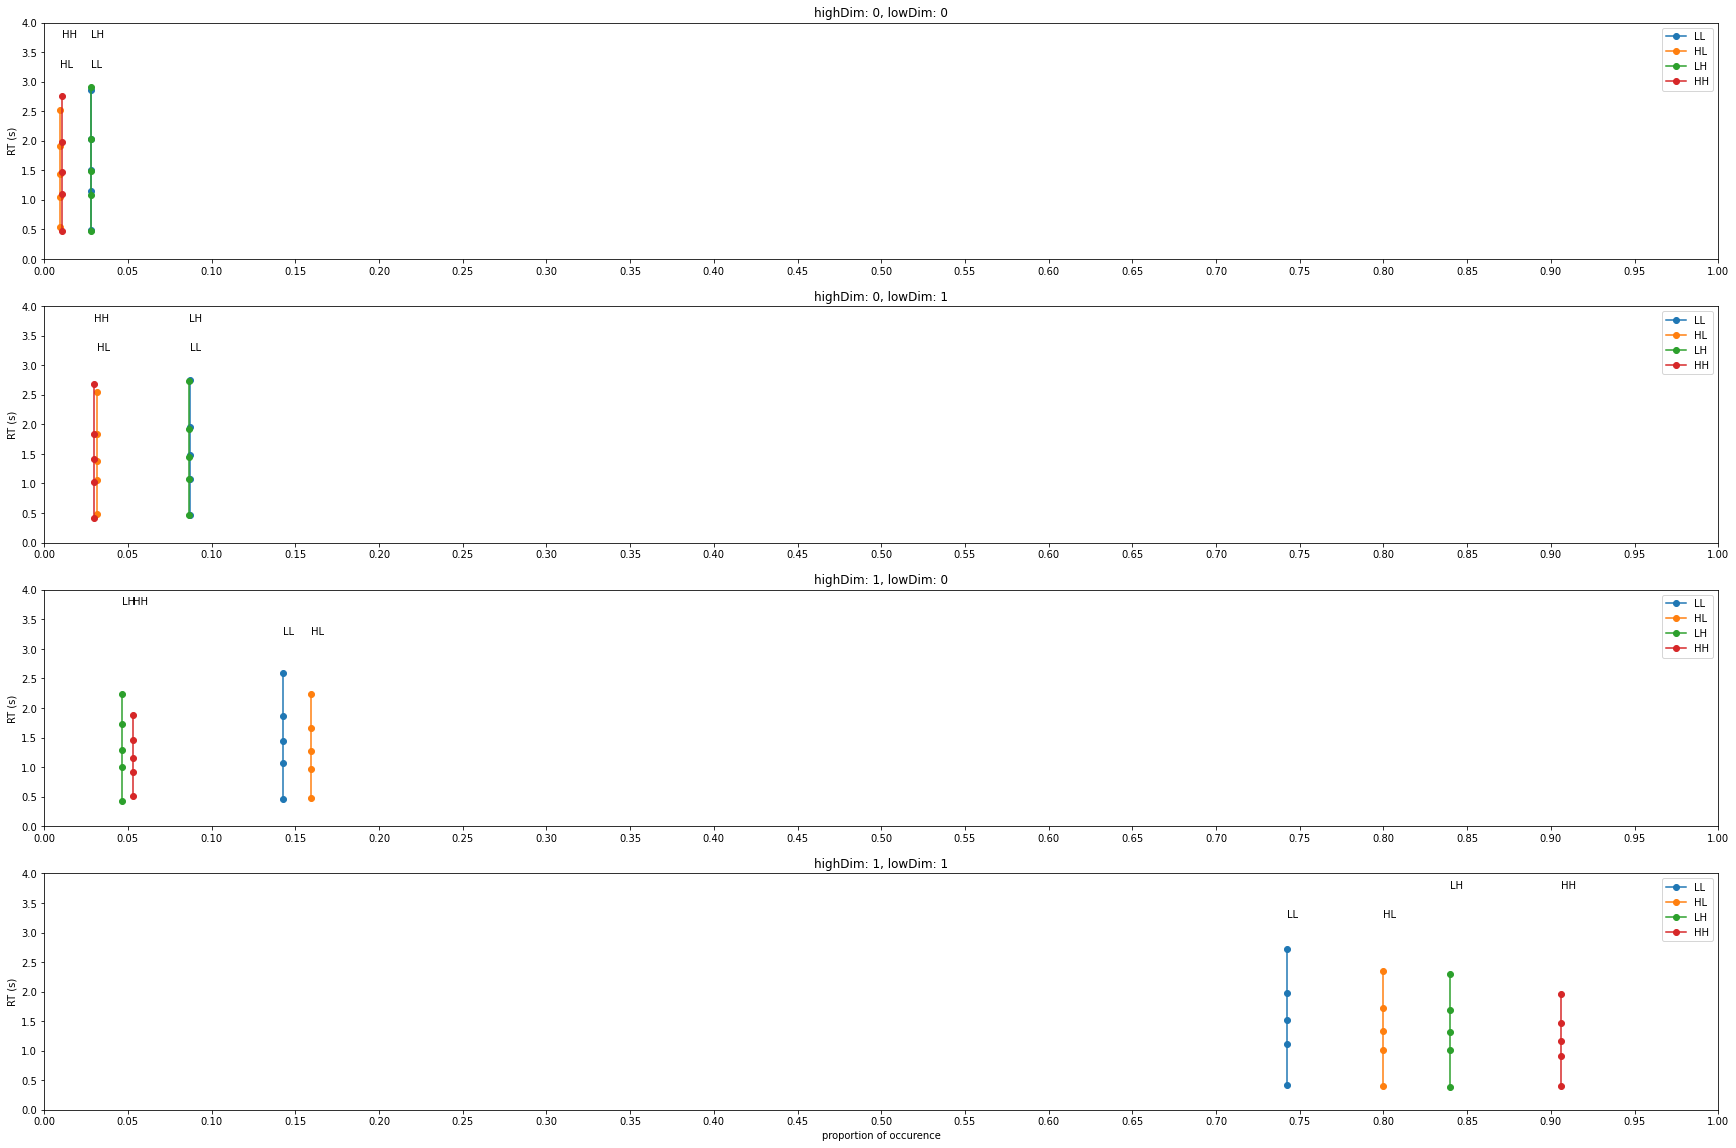

In [111]:
quant_prob_plot(model_data['ddm_seq2_angle_no_bias'],5)

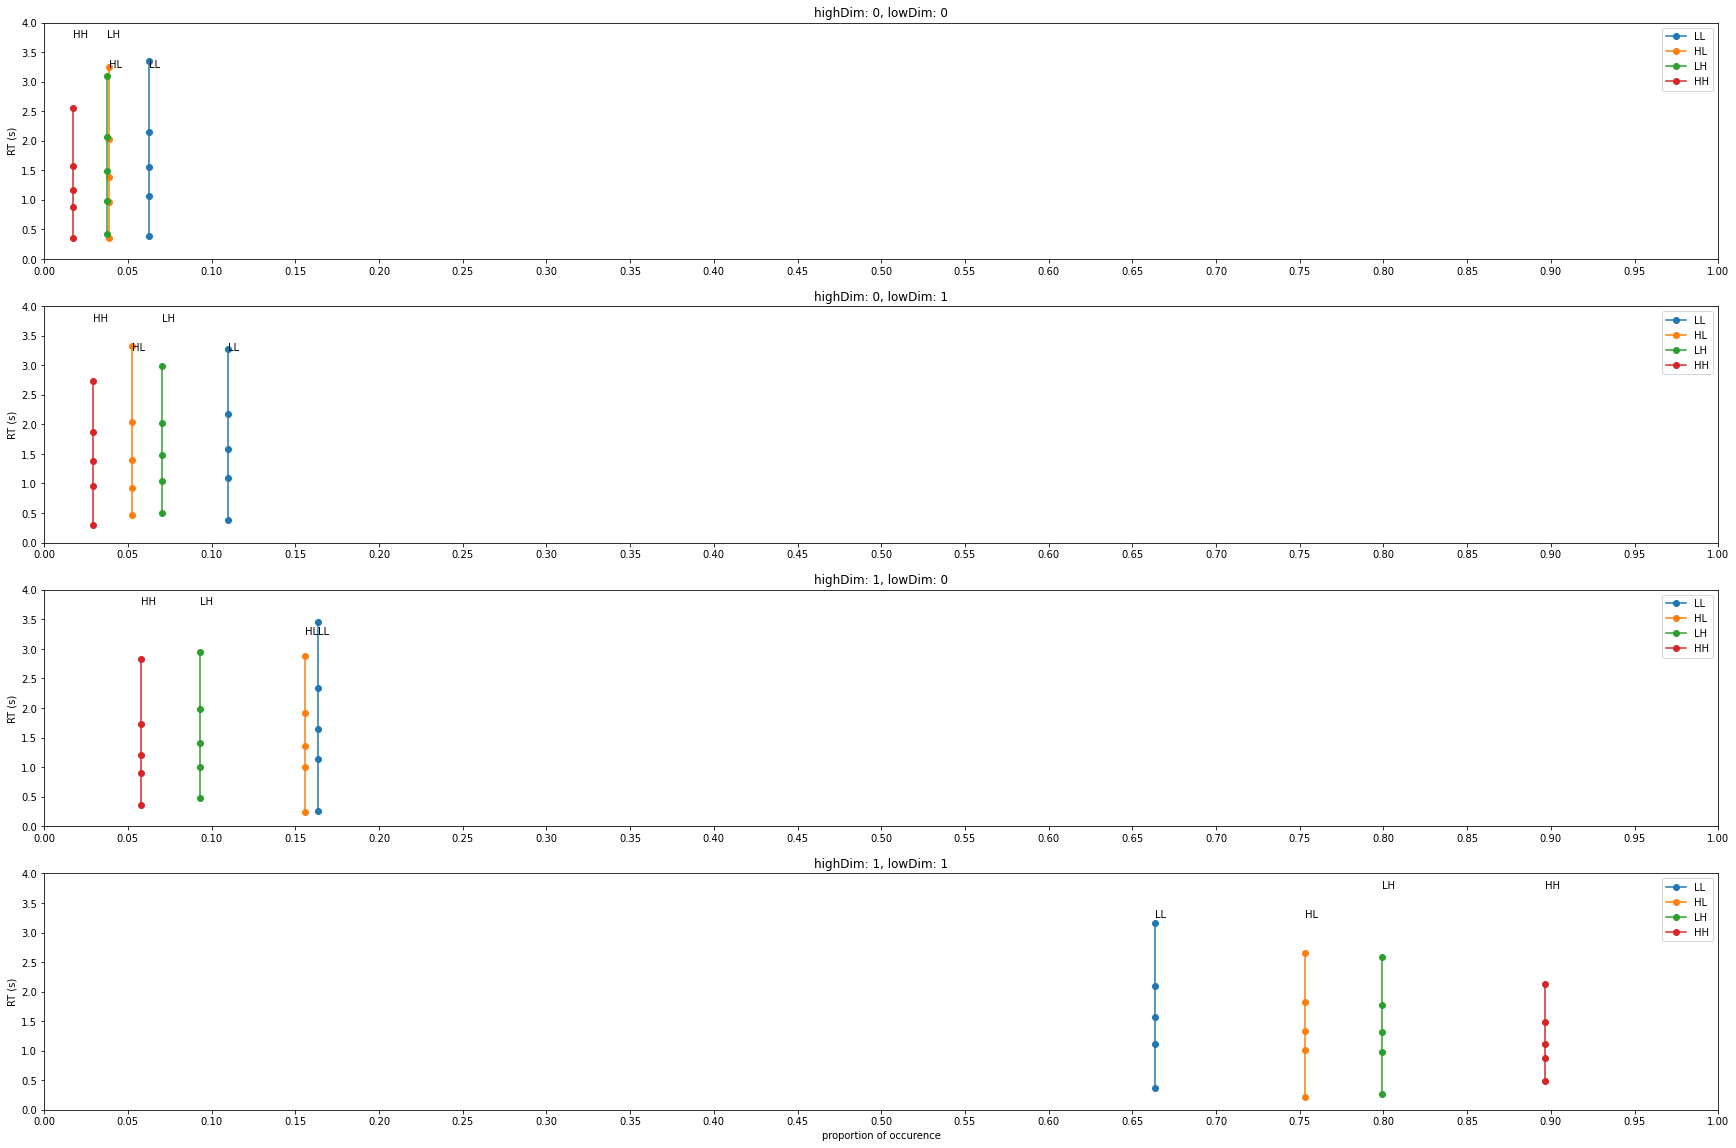

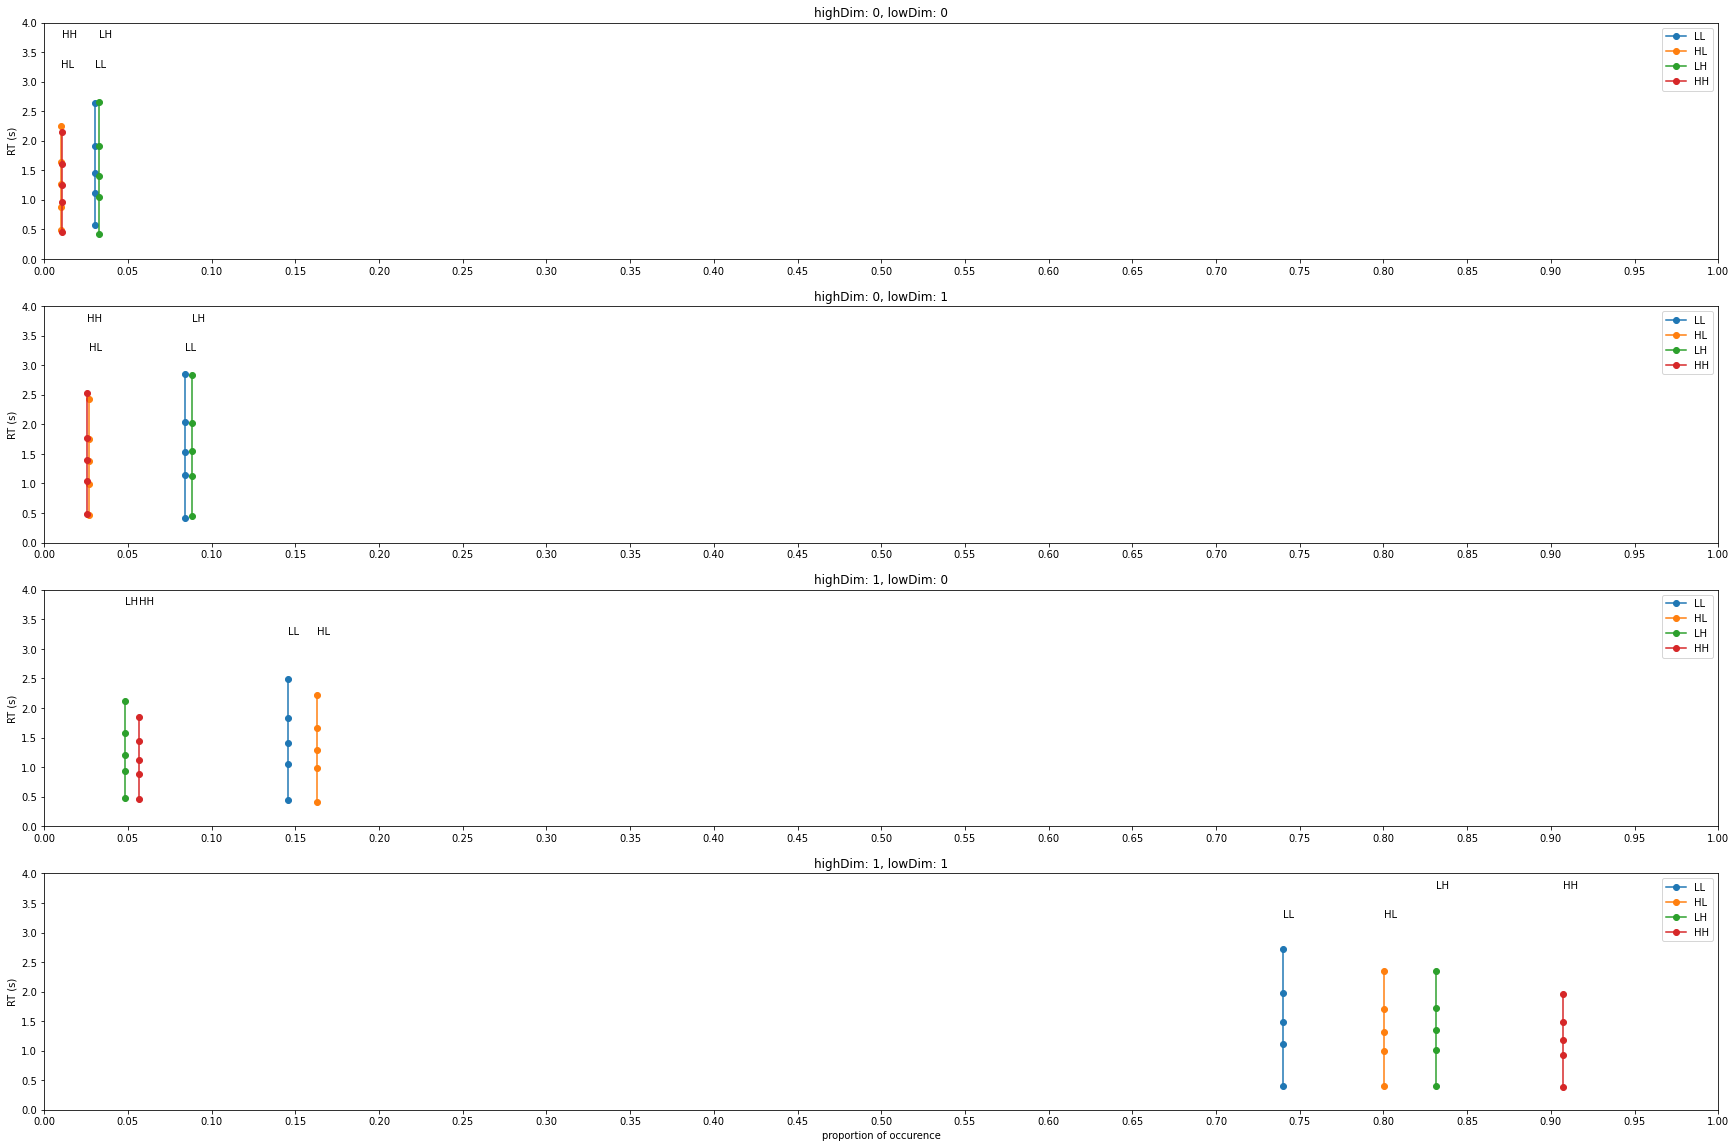

In [109]:
quant_prob_plot(model_data['chong_data'],5)
quant_prob_plot(model_data['ddm_seq2_angle_no_bias'],5)

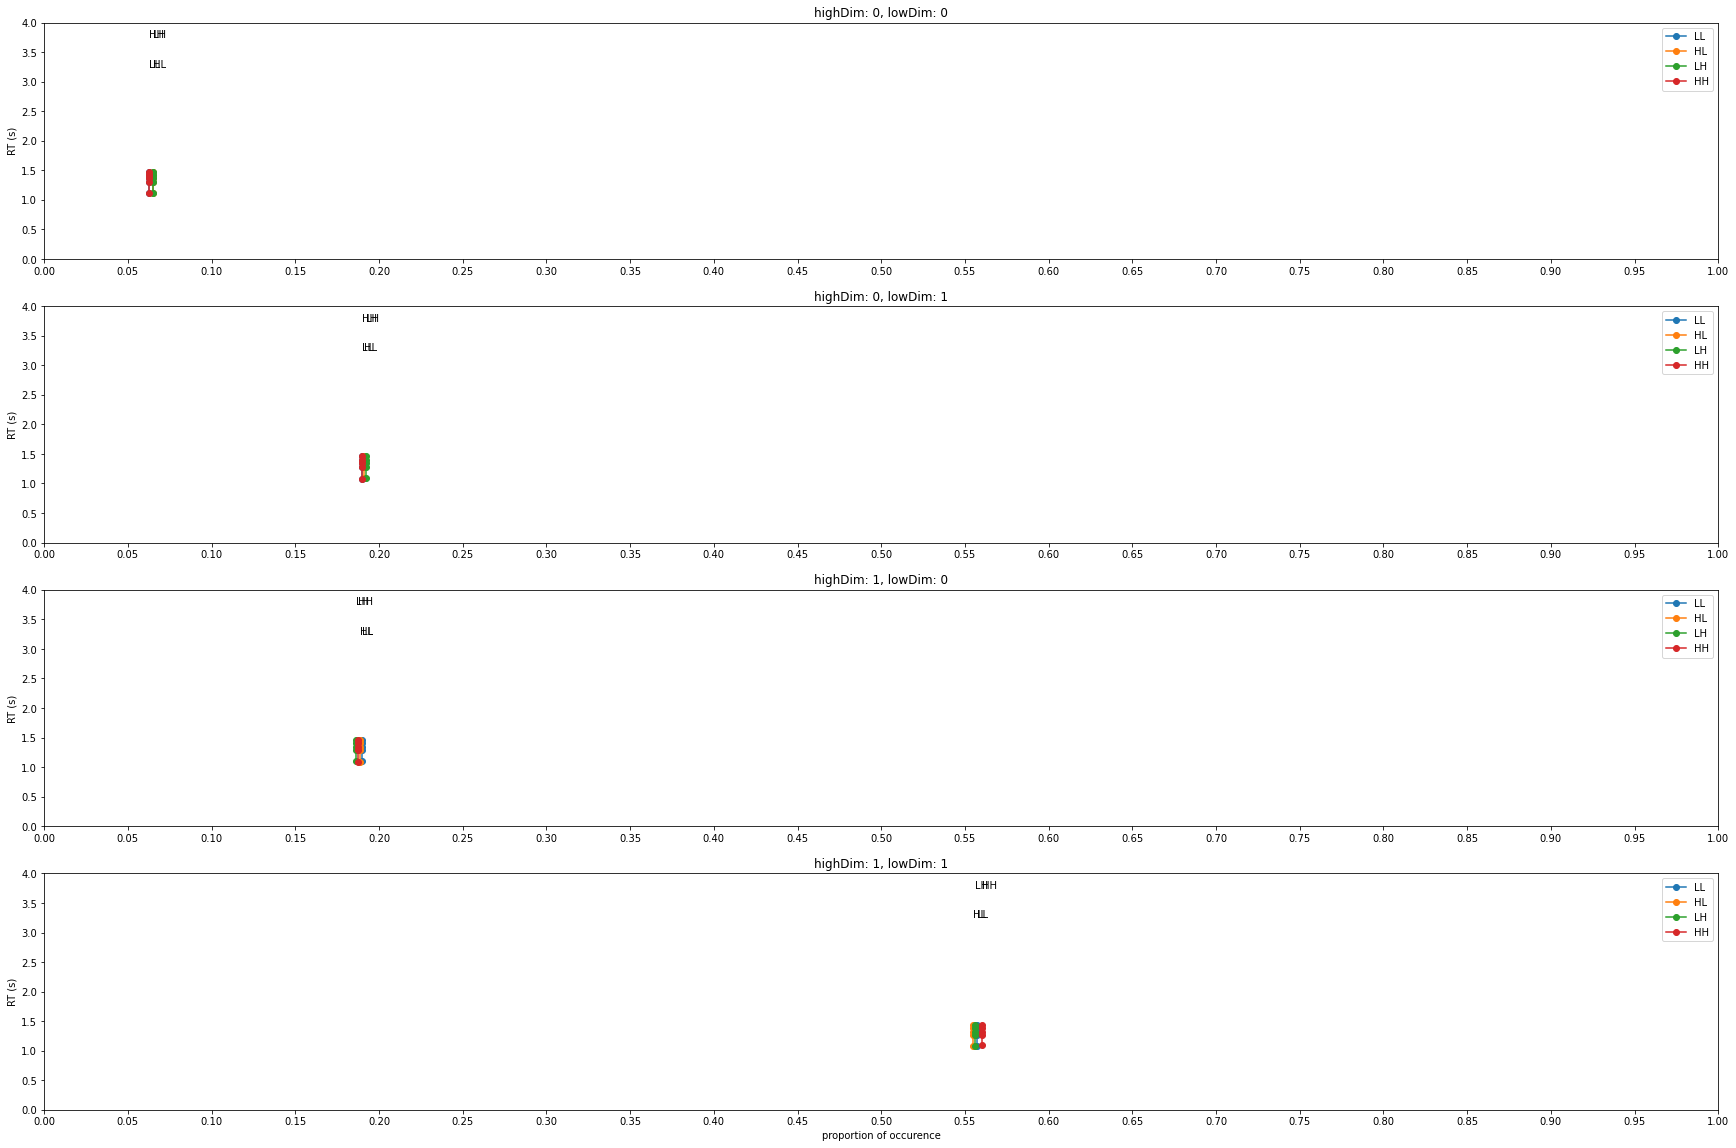

In [147]:
quant_prob_plot(model_data_2['ddm_par2_angle_no_bias'],5)

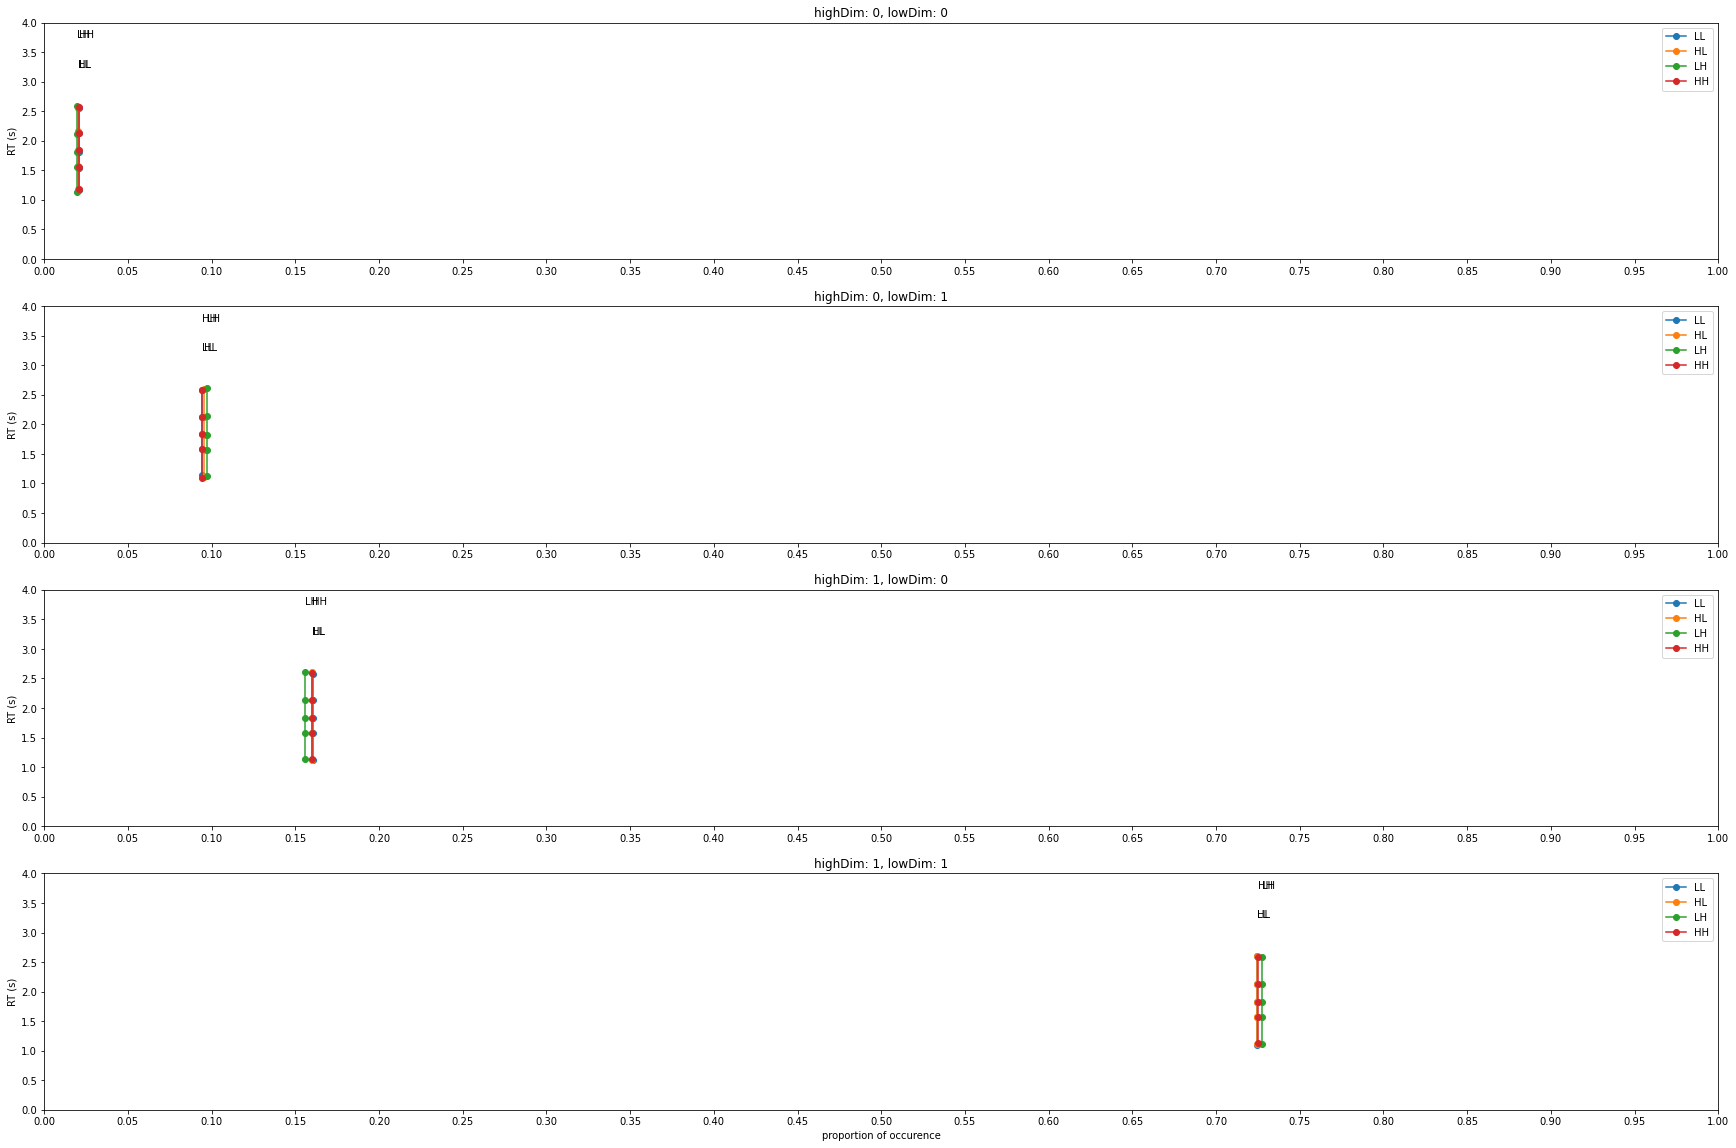

In [148]:
quant_prob_plot(model_data_2['ddm_mic2_adj_no_bias'],5)

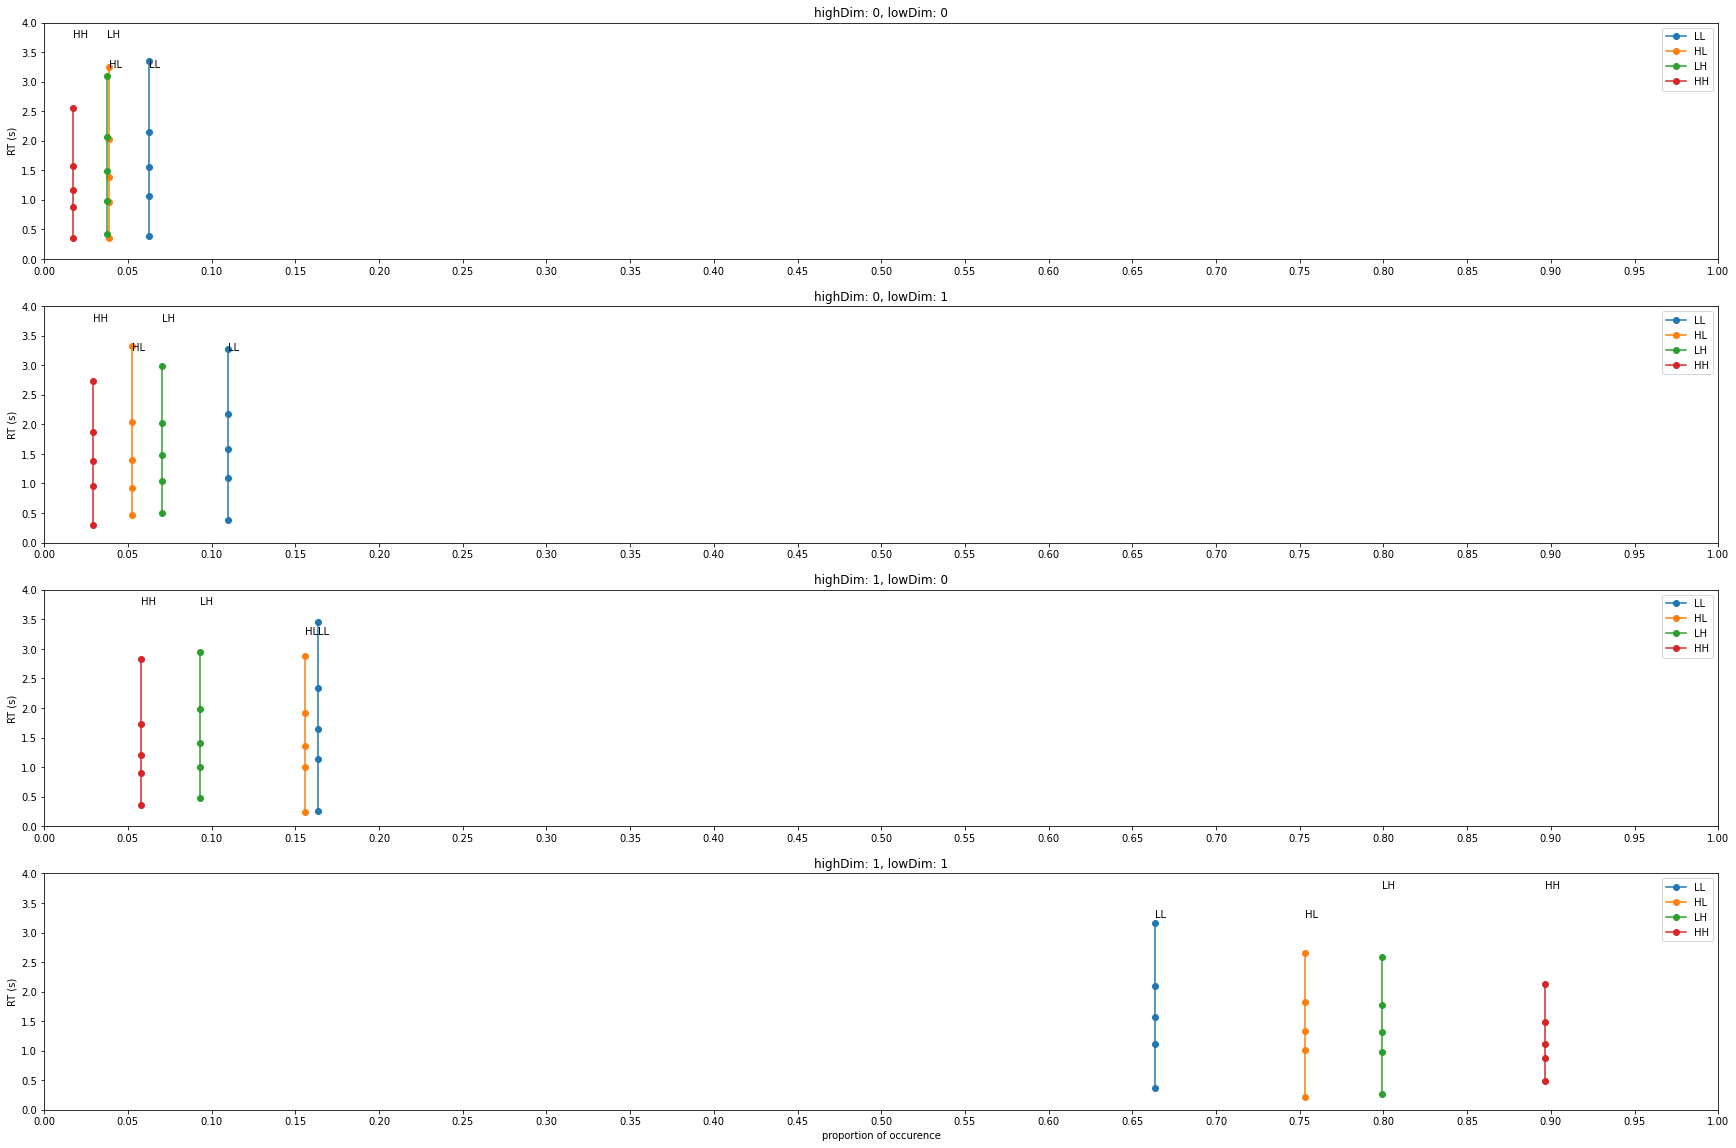

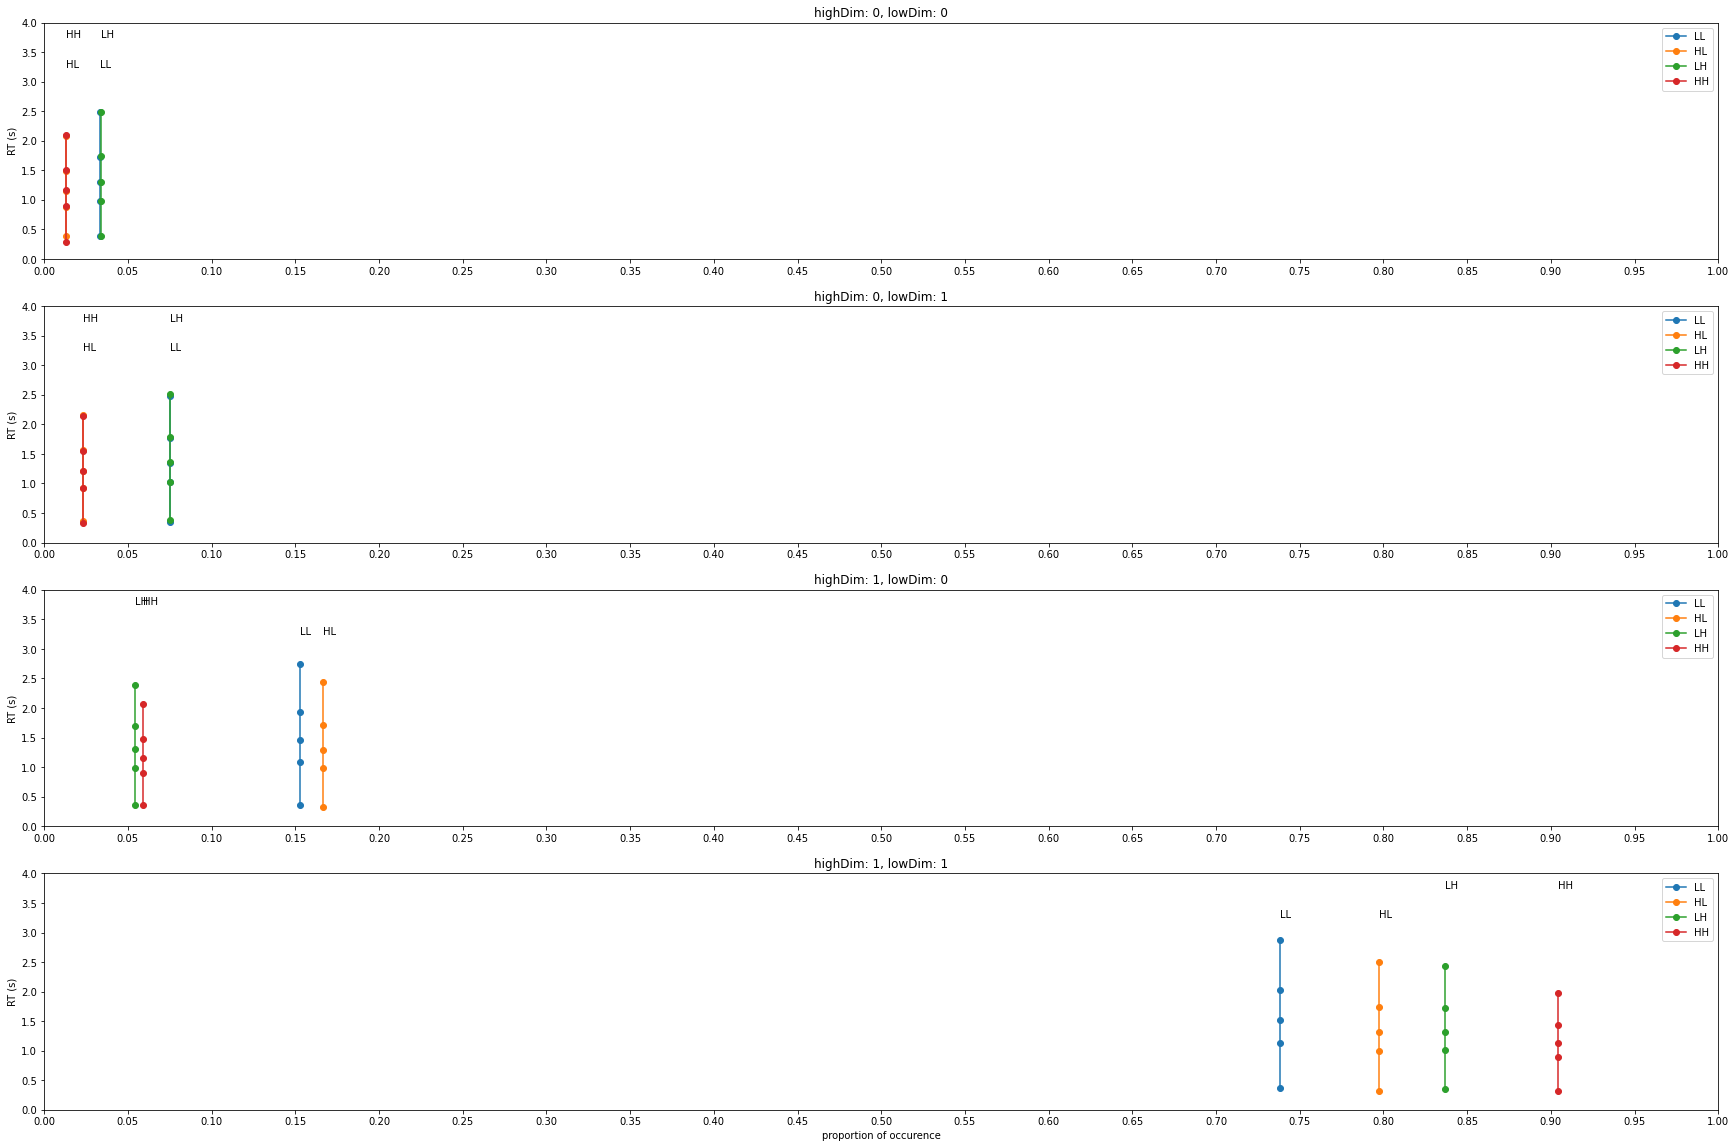

In [209]:
quant_prob_plot(model_data['chong_data'],5)
quant_prob_plot(model_data['ddm_par2_angle_no_bias'],5)

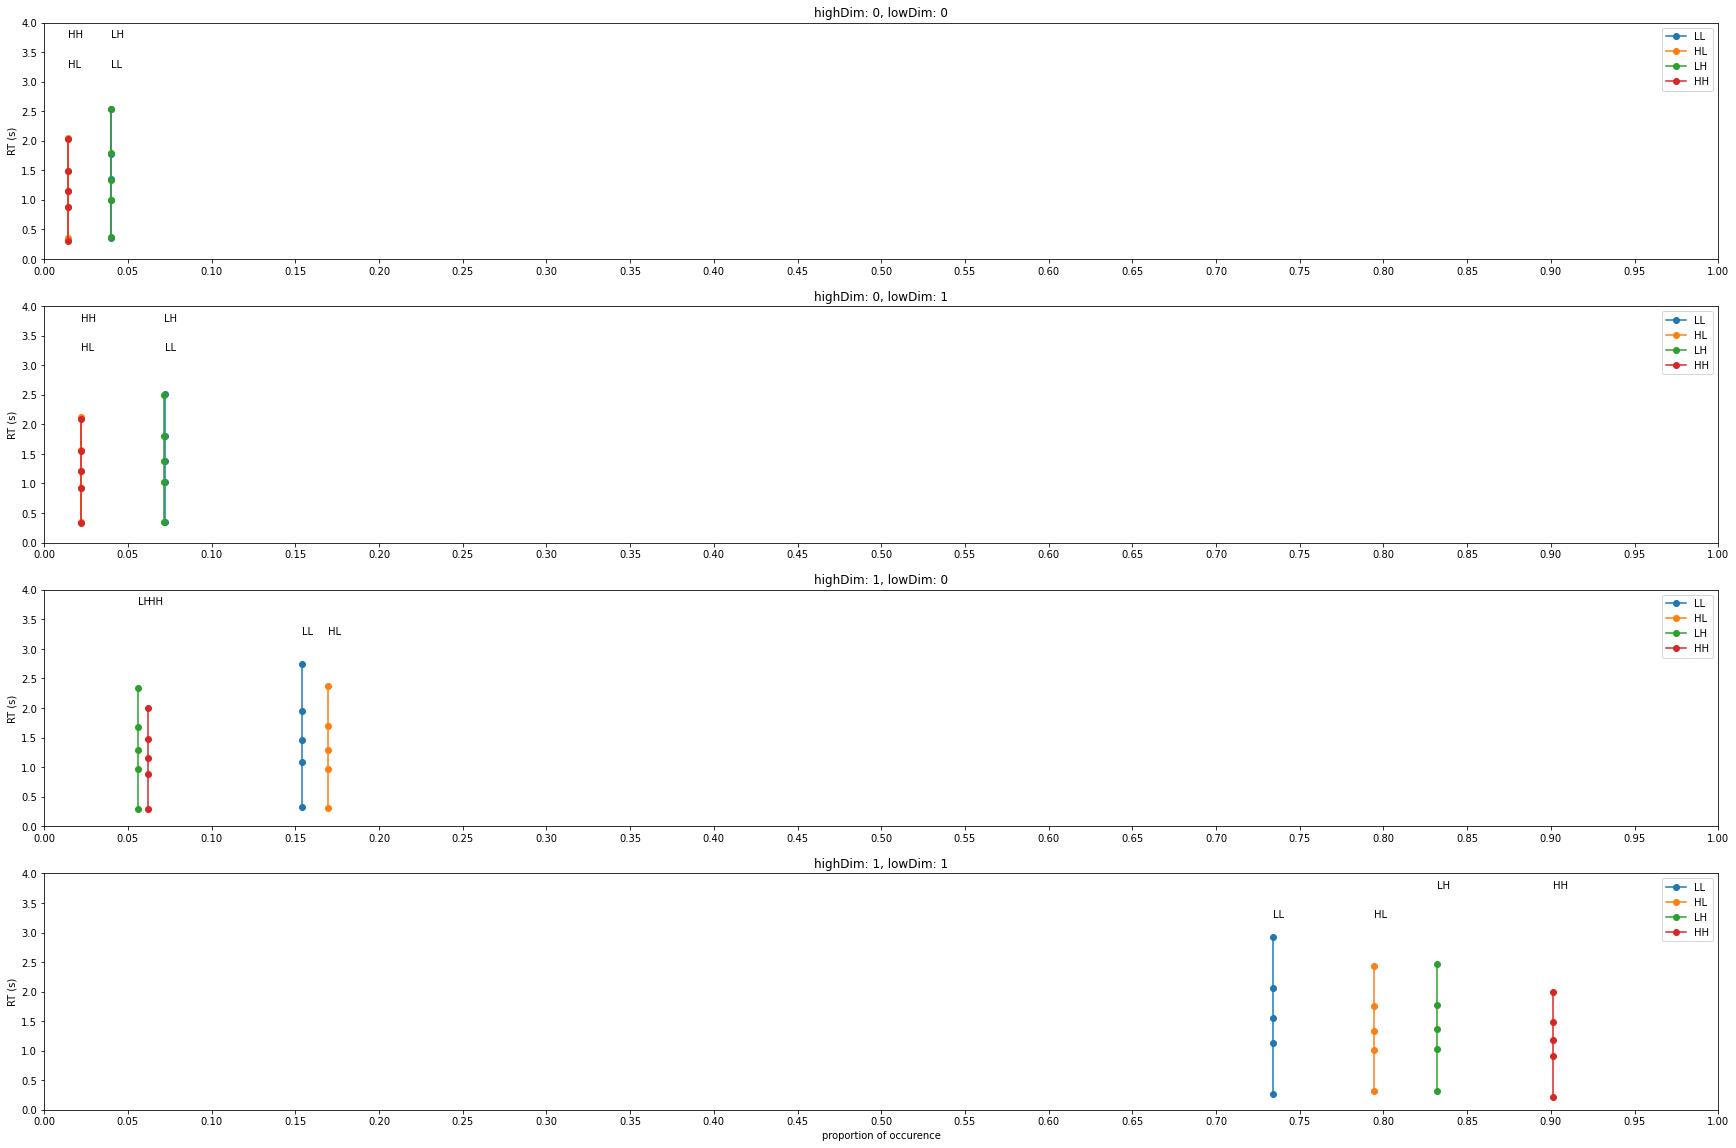

In [151]:
quant_prob_plot(model_data['ddm_seq2_angle_no_bias'],5)

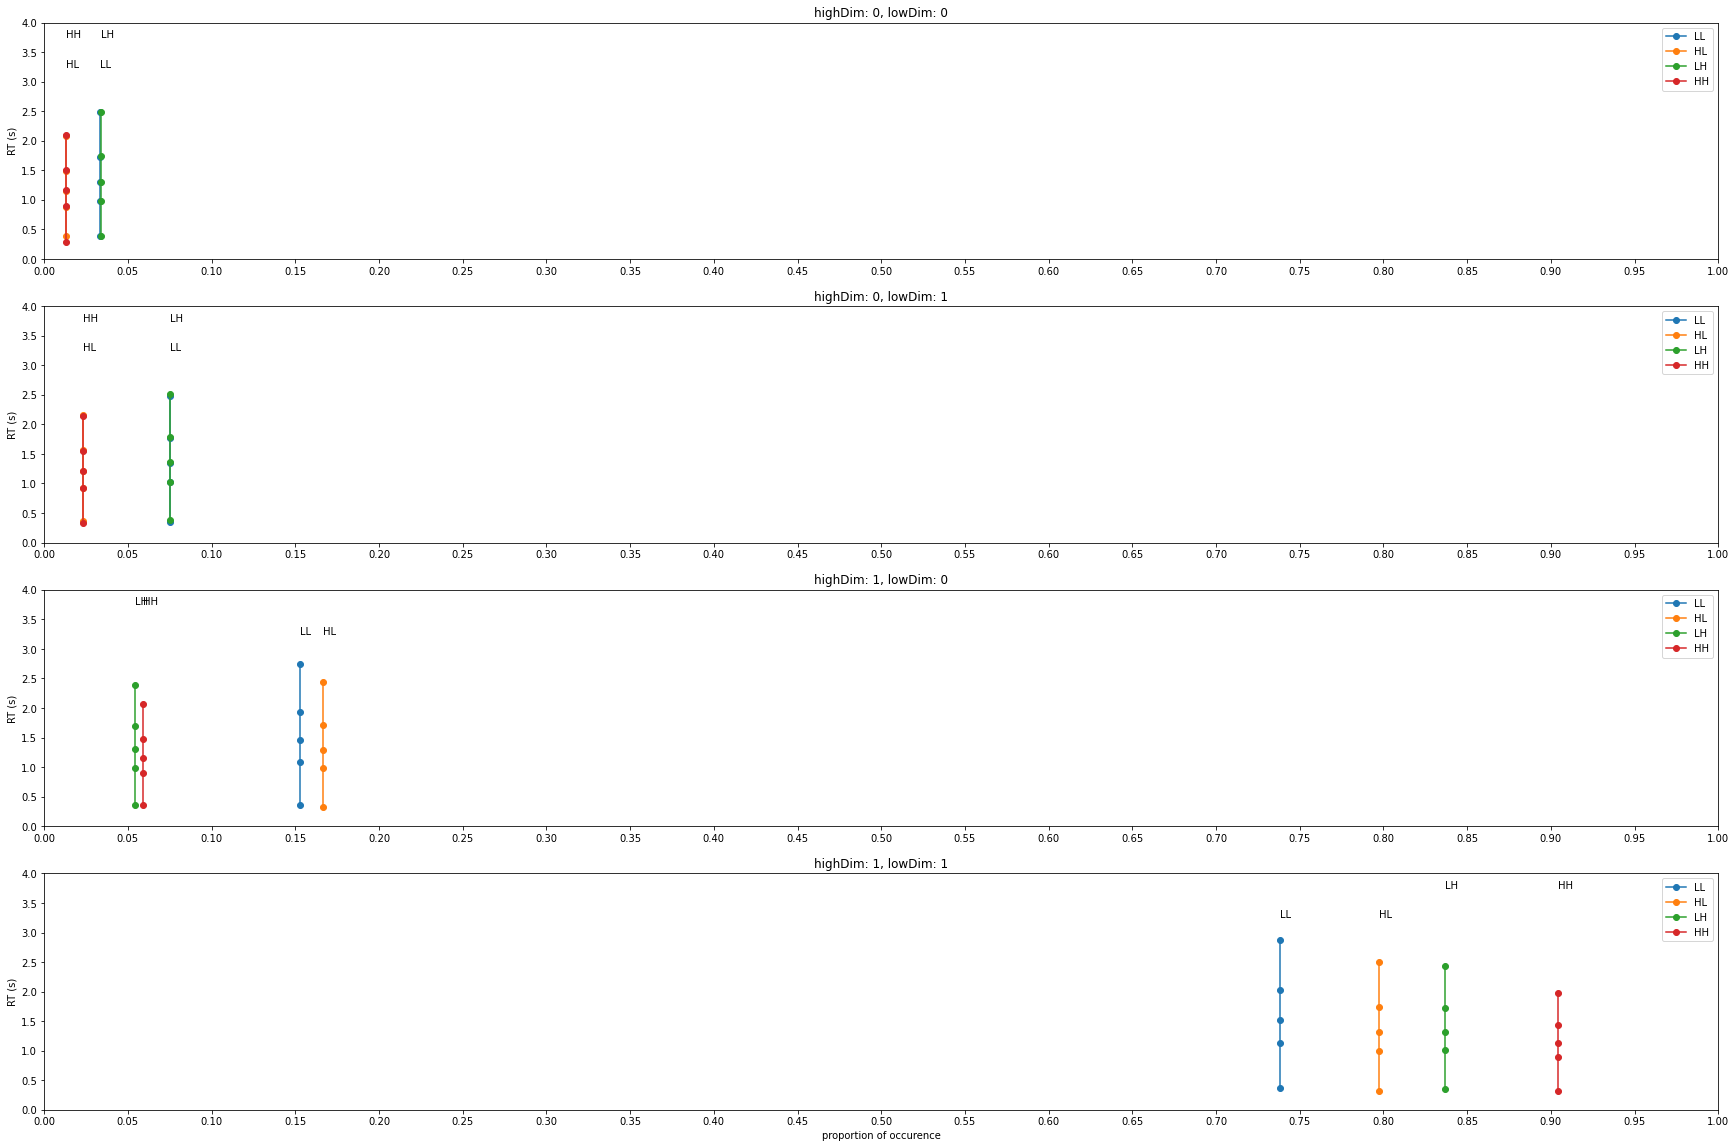

In [152]:
quant_prob_plot(model_data['ddm_par2_angle_no_bias'],5)

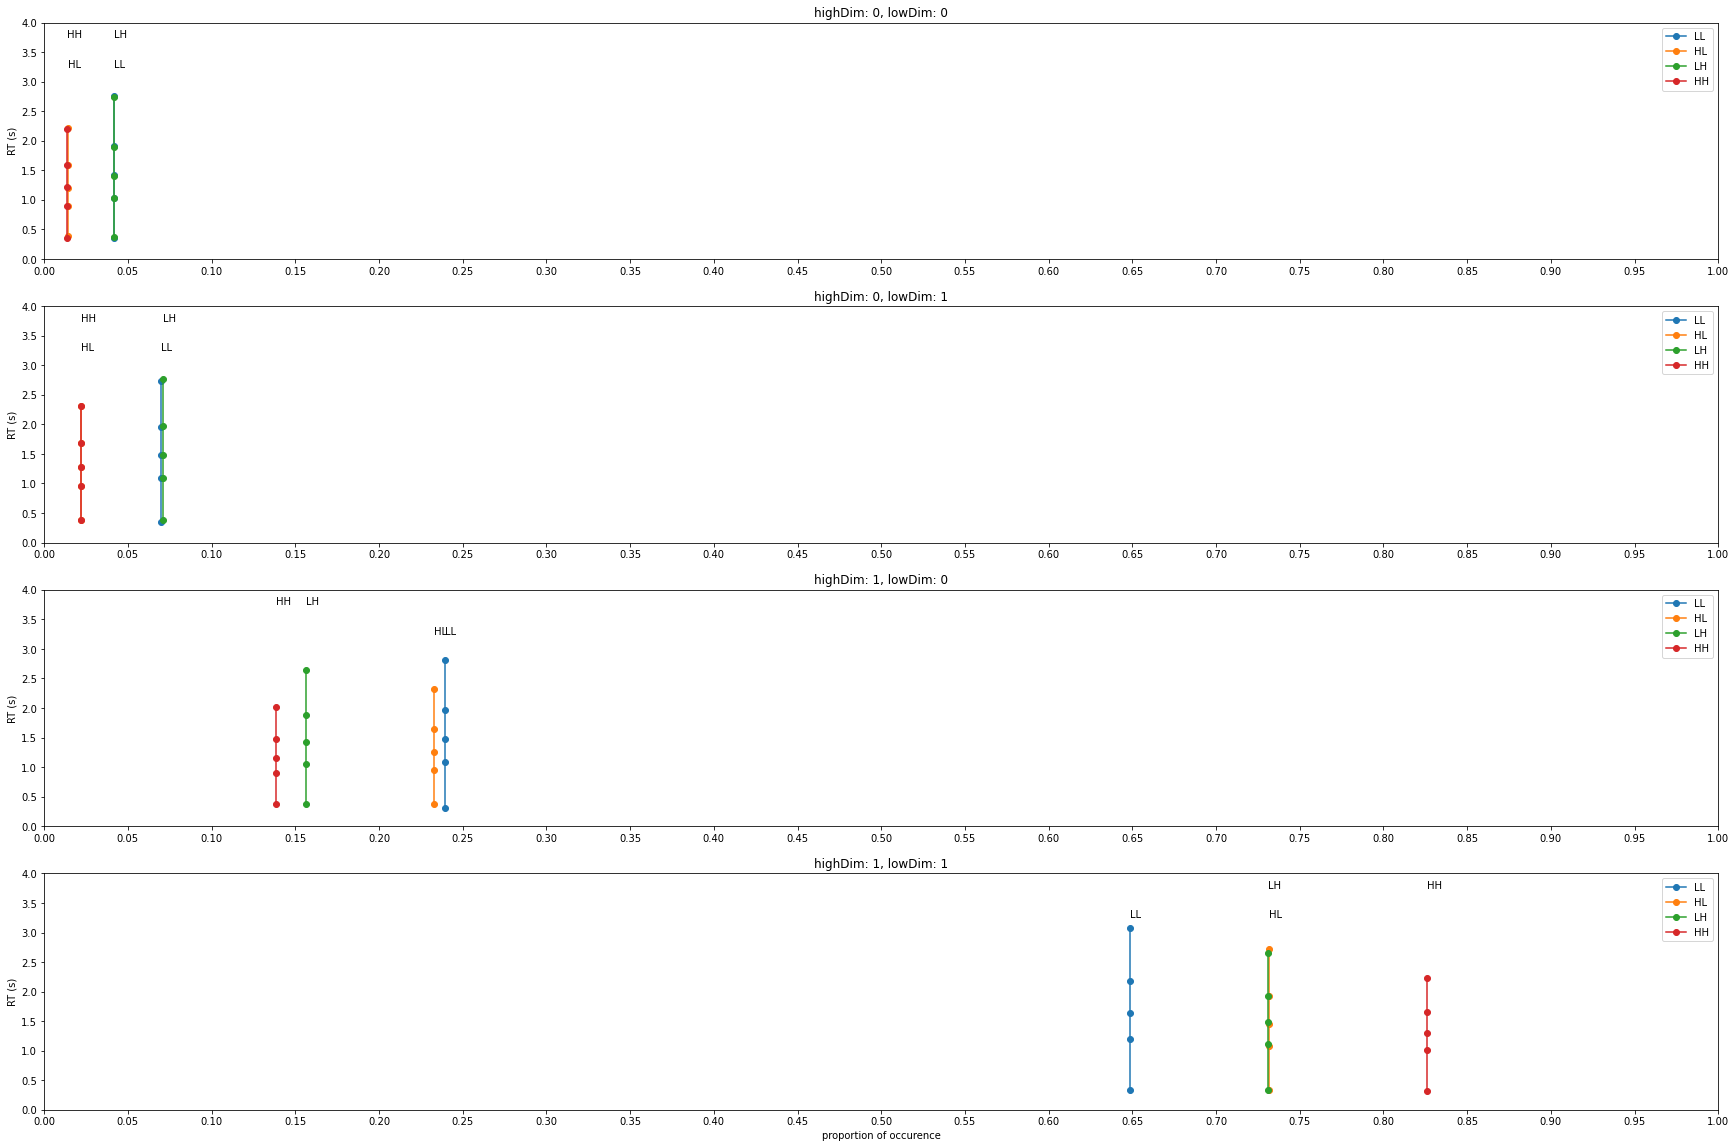

In [153]:
quant_prob_plot(model_data['ddm_mic2_adj_no_bias'],5)

In [60]:
#par2_model.get_data_nodes([1,1])
x = par2_model.data
#par2_model.data.loc['par2']

In [70]:
x_better = x.groupby(['cond', 'stim', 'subj'])

In [71]:
x_better

In [68]:
par2_model.get_data_nodes(x.loc[(x['stim'] == '13') & (x['cond'] == '212') & (x['subj'] == 1), :].index)

<pymc.distributions.new_dist_class.<locals>.new_class 'wfpt(1.2.2.1.3.2).0' at 0x294dc52e0>

In [61]:
x

,anglePer,blockN,colorPer,correct,highDim,highDimCoh,irrDim,irrDimCoh,lineCoh,lineDir,...,subj,isHighCorrect,isLowCorrect,lineOption,Unnamed: 19,rt,stim,subj_idx,cond,cond2
0,0.70,1,0.42,0,1,2,2,1,0.7,2,...,1,1,0,2,NaN,6.58130,13,0,212,22
1,0.30,1,0.42,0,1,2,2,1,0.7,2,...,1,1,0,2,NaN,6.58130,13,0,212,22
2,0.70,1,0.58,1,1,1,3,2,0.4,1,...,1,1,1,1,NaN,3.38240,12,0,121,11
3,0.30,1,0.42,1,1,1,2,1,0.6,2,...,1,1,1,2,NaN,2.99910,13,0,112,12
4,0.58,1,0.30,1,1,2,3,1,0.3,1,...,1,1,1,1,NaN,1.54990,12,0,212,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18852,0.30,4,0.70,1,3,2,2,2,0.4,1,...,37,1,1,1,NaN,4.42260,31,36,221,21
18853,0.30,4,0.42,1,3,2,2,1,0.6,2,...,37,1,1,2,NaN,3.87390,31,36,211,21
18854,0.42,4,0.58,1,3,1,2,1,0.6,2,...,37,1,1,2,NaN,1.49640,31,36,111,11
18855,0.58,4,0.58,0,3,1,1,1,0.6,2,...,37,0,1,2,NaN,0.66516,32,36,111,11


In [66]:
x.loc[(x['stim'] == '13') & (x['cond'] == '212'), :].index

Int64Index([    0,     1,    33,    34,    42,    48,    49,    89,   144,
              146,
            ...
            17674, 17697, 17728, 17732, 17752, 17781, 17790, 17806, 17812,
            17831],
           dtype='int64', length=384)

In [3]:
chong_data = hddm.load_csv("hierarchical_decision_making/data/chong_data_hddm_ready.csv")

    # Specify model depends_on arguments, as per supplied arguments ----
depends_on = {'vh': [],'vl1': [],'vl2': []}

In [4]:
depends_on['vh'].append('highDimCoh')
depends_on['vl1'].append('irrDimCoh')
depends_on['vl2'].append('lowDimCoh')

In [155]:
model = "ddm_seq2_angle_no_bias"

In [73]:
hddm_model_ = hddm.HDDMnn(chong_data,
            model = model,
            informative = False,
            include = hddm.simulators.model_config[model]['hddm_include'],
            is_group_model = False,
            depends_on = depends_on,
            p_outlier = 0.00,
            network_type='torch_mlp',
            w_outlier = 0)


Setting priors uninformative (LANs only work with uninformative priors for now)


In [180]:
hddm_model_ = hddm.HDDMnn(data,
            model = model,
            informative = False,
            include = hddm.simulators.model_config[model]['hddm_include'],
            is_group_model = False,
            depends_on = depends_on,
            p_outlier = 0.05,
            network_type='torch_mlp',
            )

Setting priors uninformative (LANs only work with uninformative priors for now)


In [181]:
nmcmc=200
nburn = 20

In [182]:
# Sample from model              
hddm_model_.sample(nmcmc, 
      burn = nburn, 
      dbname = '' + \
              '{}_chong_task_{}_coh_{}_group_{}_chain_{}.db'.format(str(model),
                                                                    str(0),
                                                                    str(1), 
                                                                    str(0),
                                                                    str(1)),
                                                                    db = 'pickle')

 [-----------------100%-----------------] 201 of 200 complete in 114.0 sec

In [ ]:
hddm_model_.save('' + \
                        '{}_chong_task_{}_coh_{}_group_{}_chain_{}.pickle'.format(str(args.model),
                                                                                  str(args.dep_on_task),
                                                                                  str(args.dep_on_coh),
                                                                                  str(args.is_group_model),
                                                                                  str(chain)))

In [ ]:
full_data = []
all_params = []
test_data = data
for i in range(1):
  data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(data = _data.copy(),
                                                                                      model = 'ddm_seq2_angle_no_bias',
                                                                                      p_outlier = 0.00,
                                                                                      #conditions = None,
                                                                                      depends_on = {},#depends_on,
                                                                                      regression_models = [],
                                                                                      regression_covariates = None,
                                                                                      #group_only_regressors = False,
                                                                                      group_only = None)
                                                                                      #fixed_at_default = None) #['z'])
  full_data.append(data)
  all_params.append(full_parameter_dict)
full_data = pd.concat(full_data)

In [165]:
#ds = [d1, d2]
d = {}
for k in all_params[0].keys():
    d[k] = list(d[k] for d in all_params)

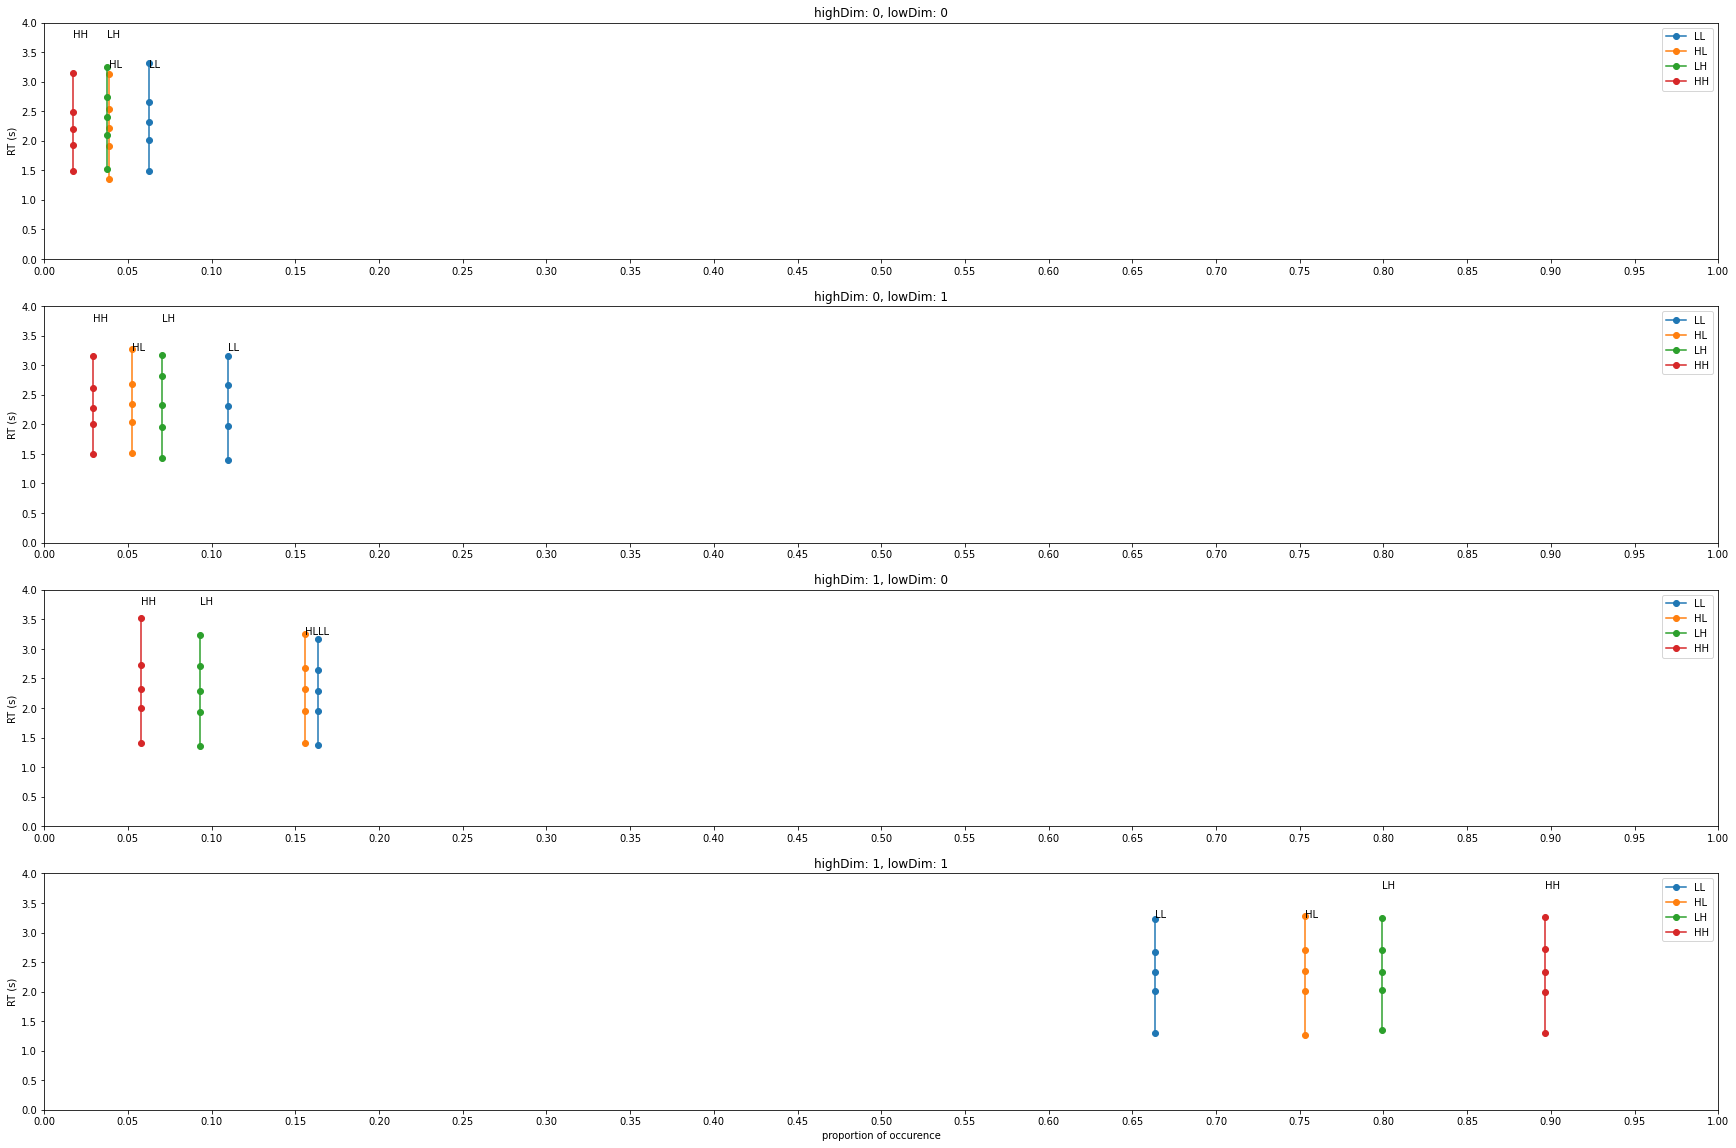

In [167]:
quant_prob_plot(test_data,5)

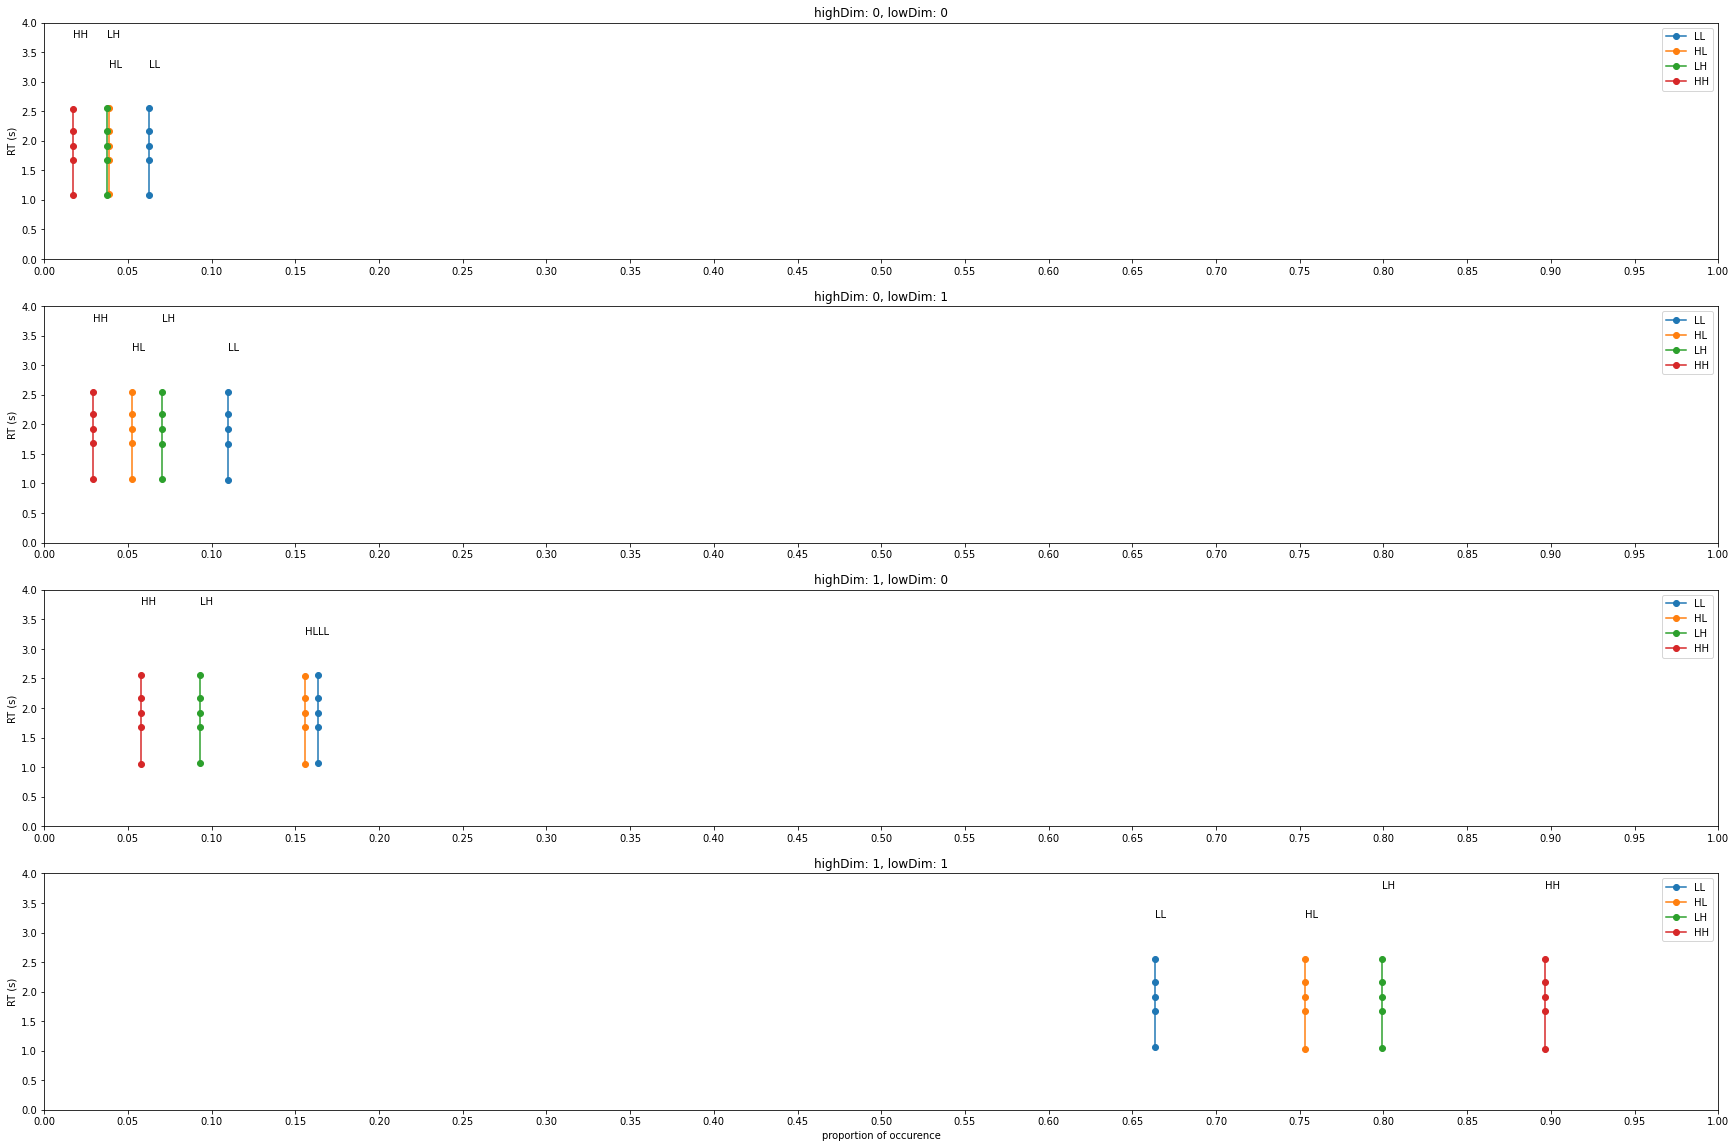

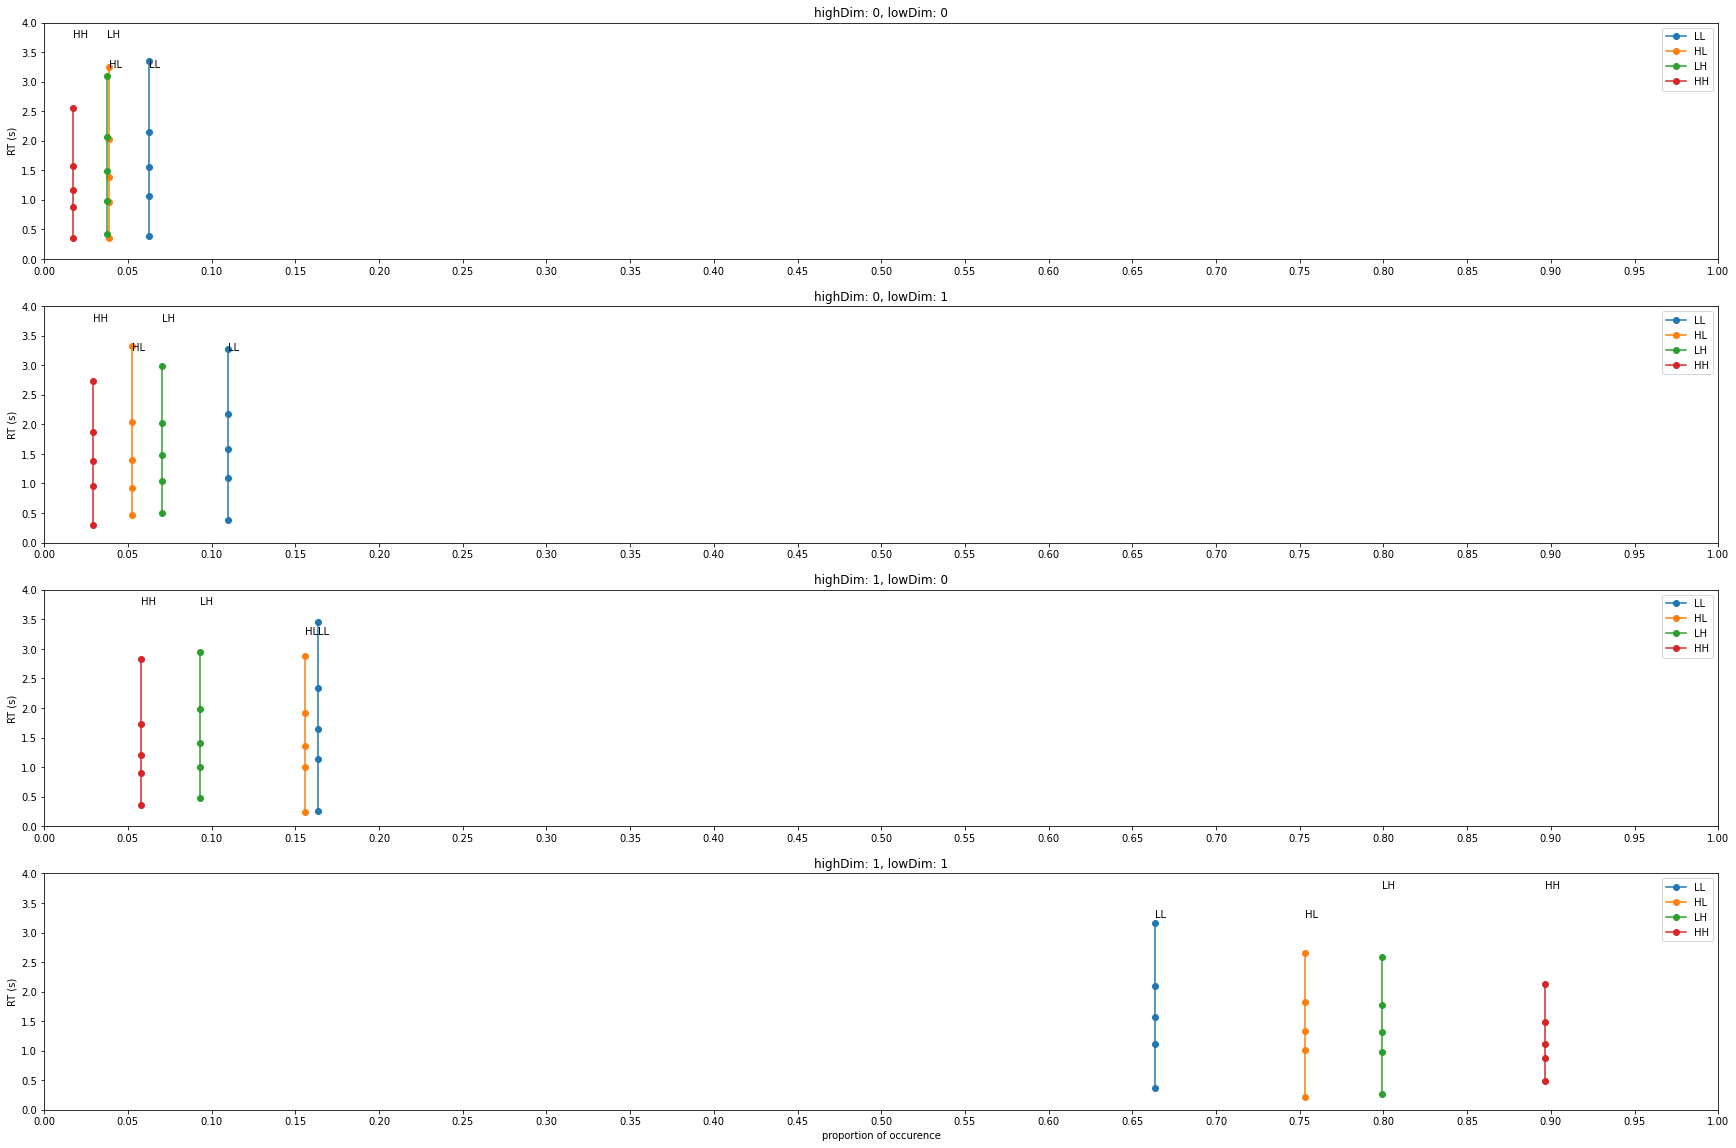

In [176]:
quant_prob_plot(full_data,5)
quant_prob_plot(chong_data,5)

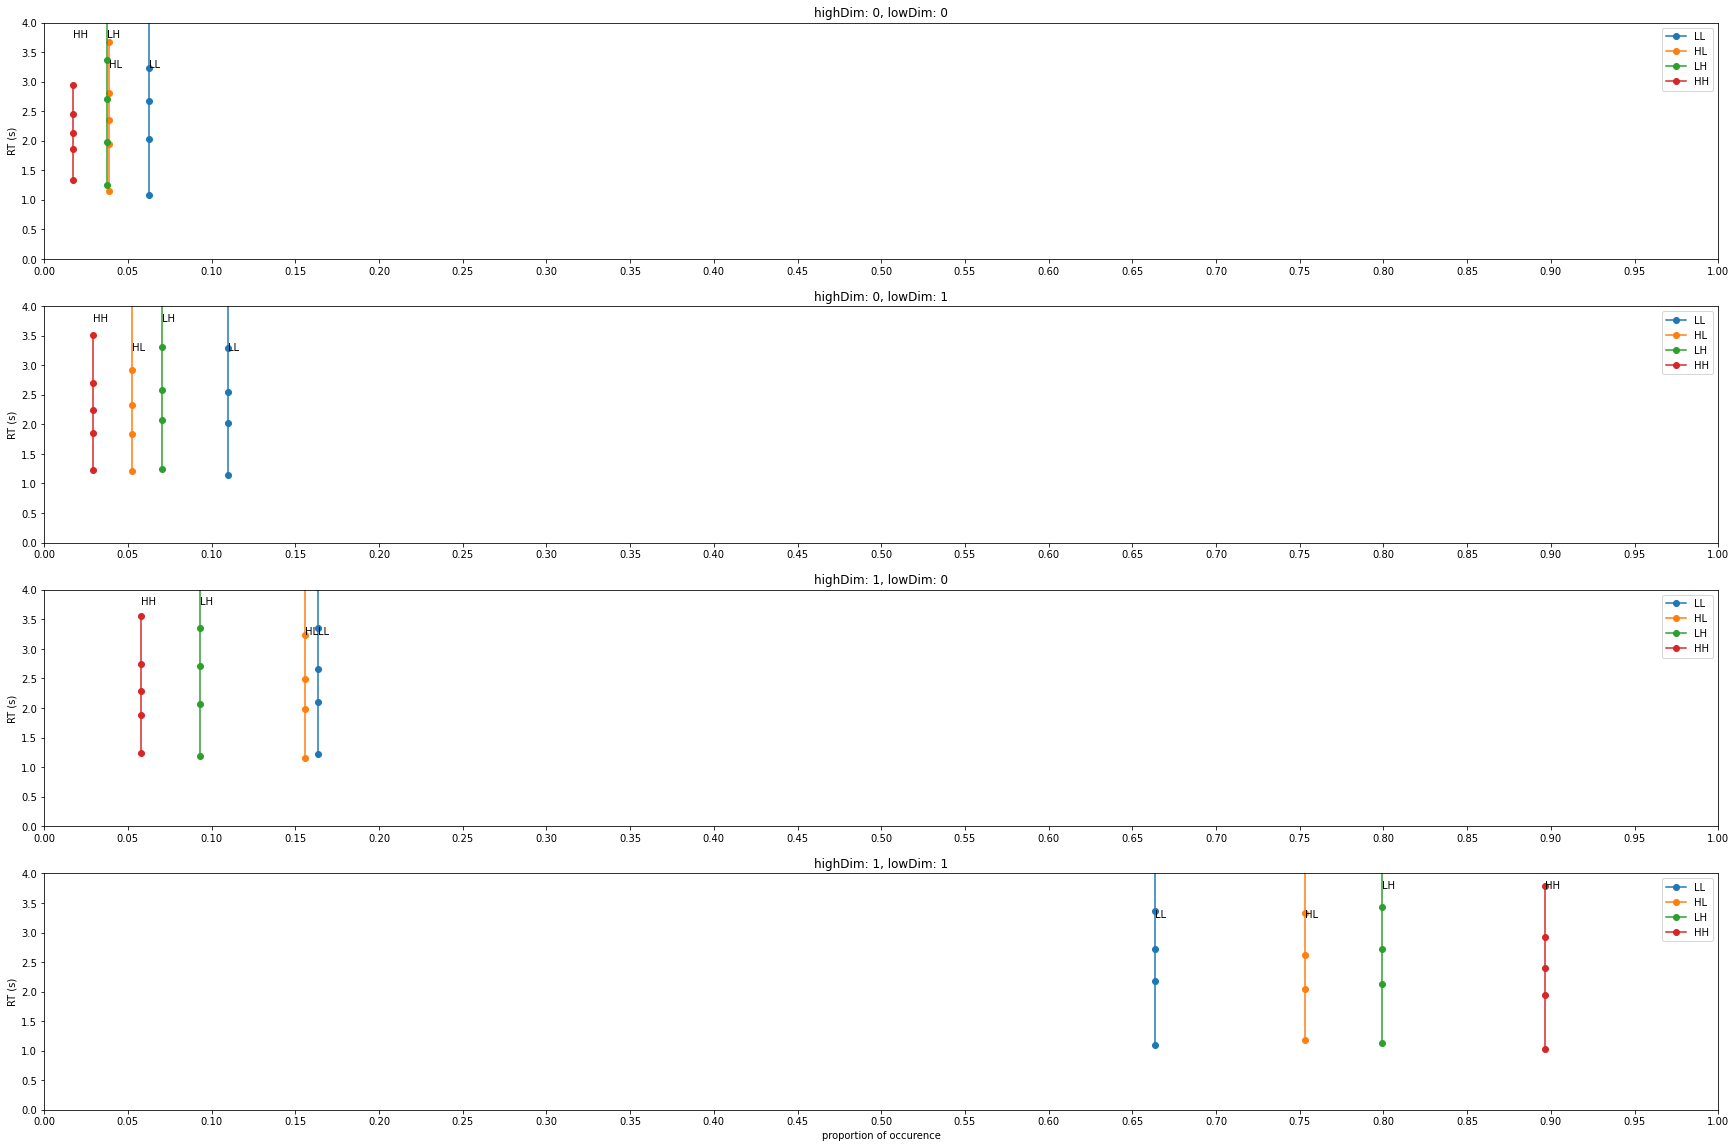

In [33]:
quant_prob_plot(data,5)

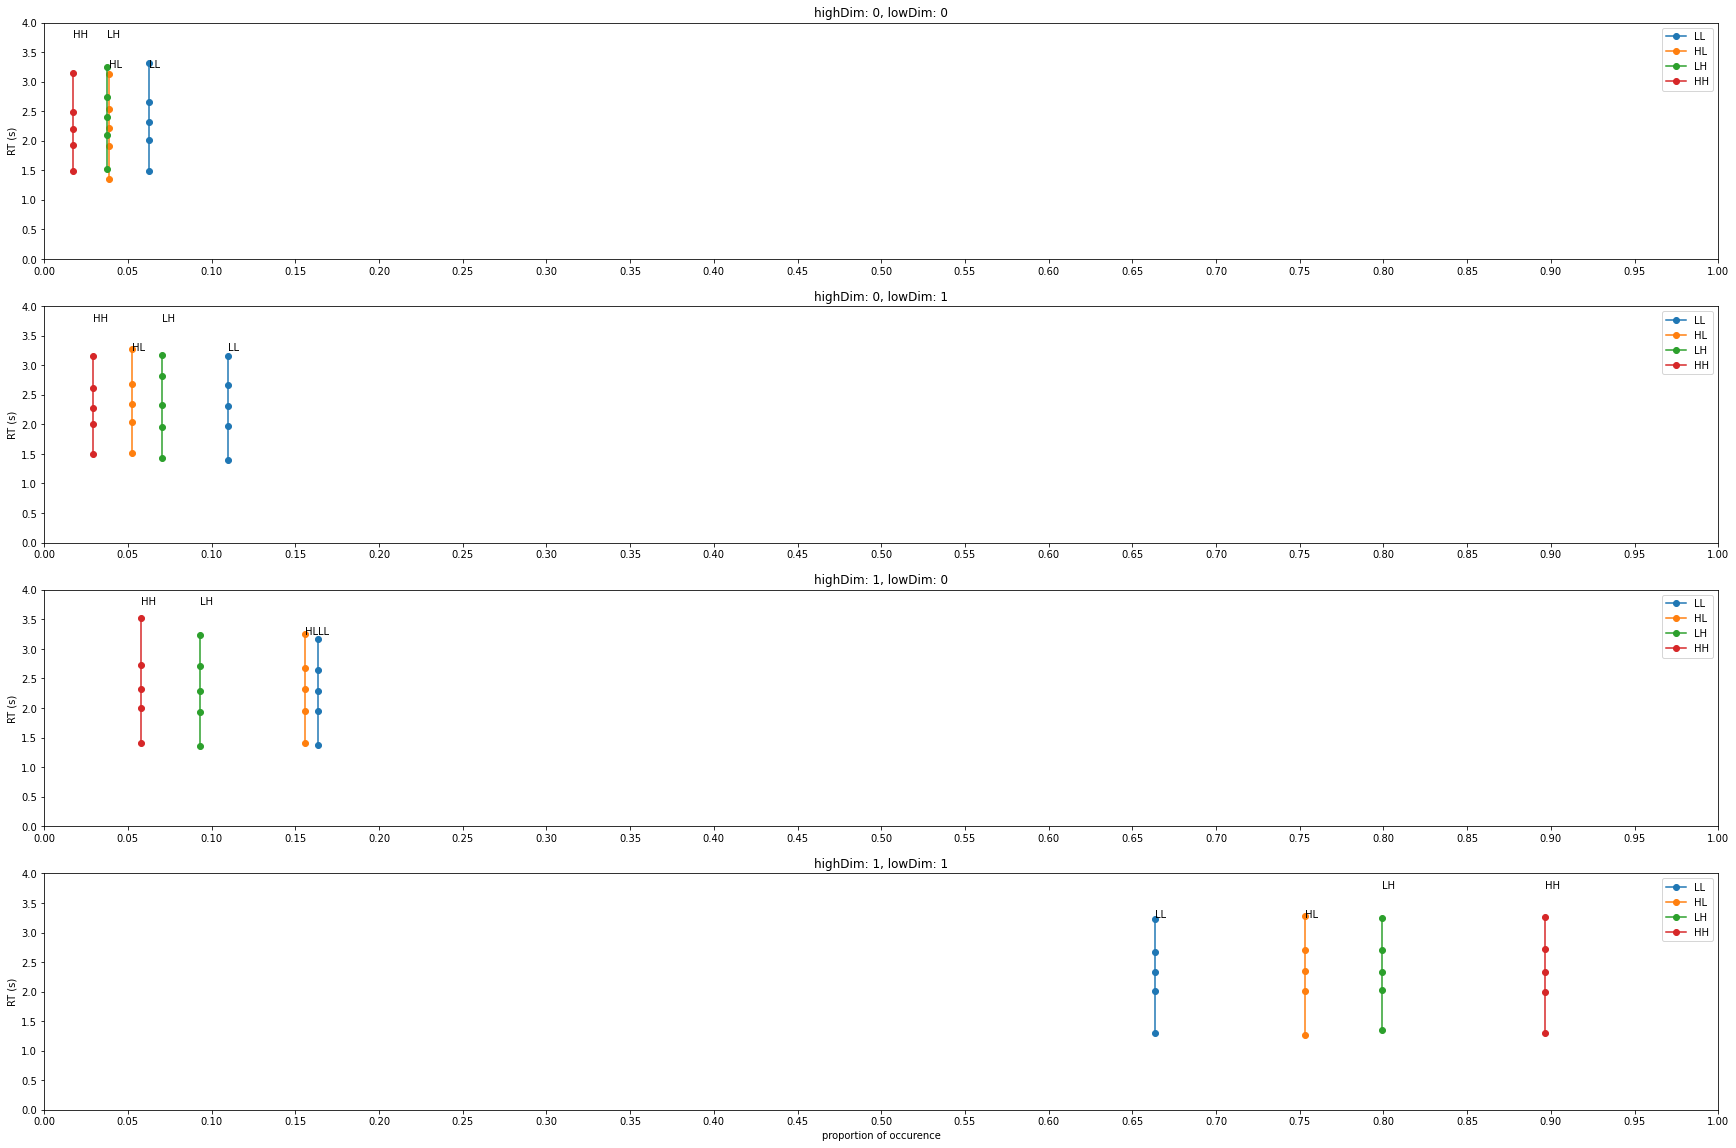

In [163]:
quant_prob_plot(data,5)

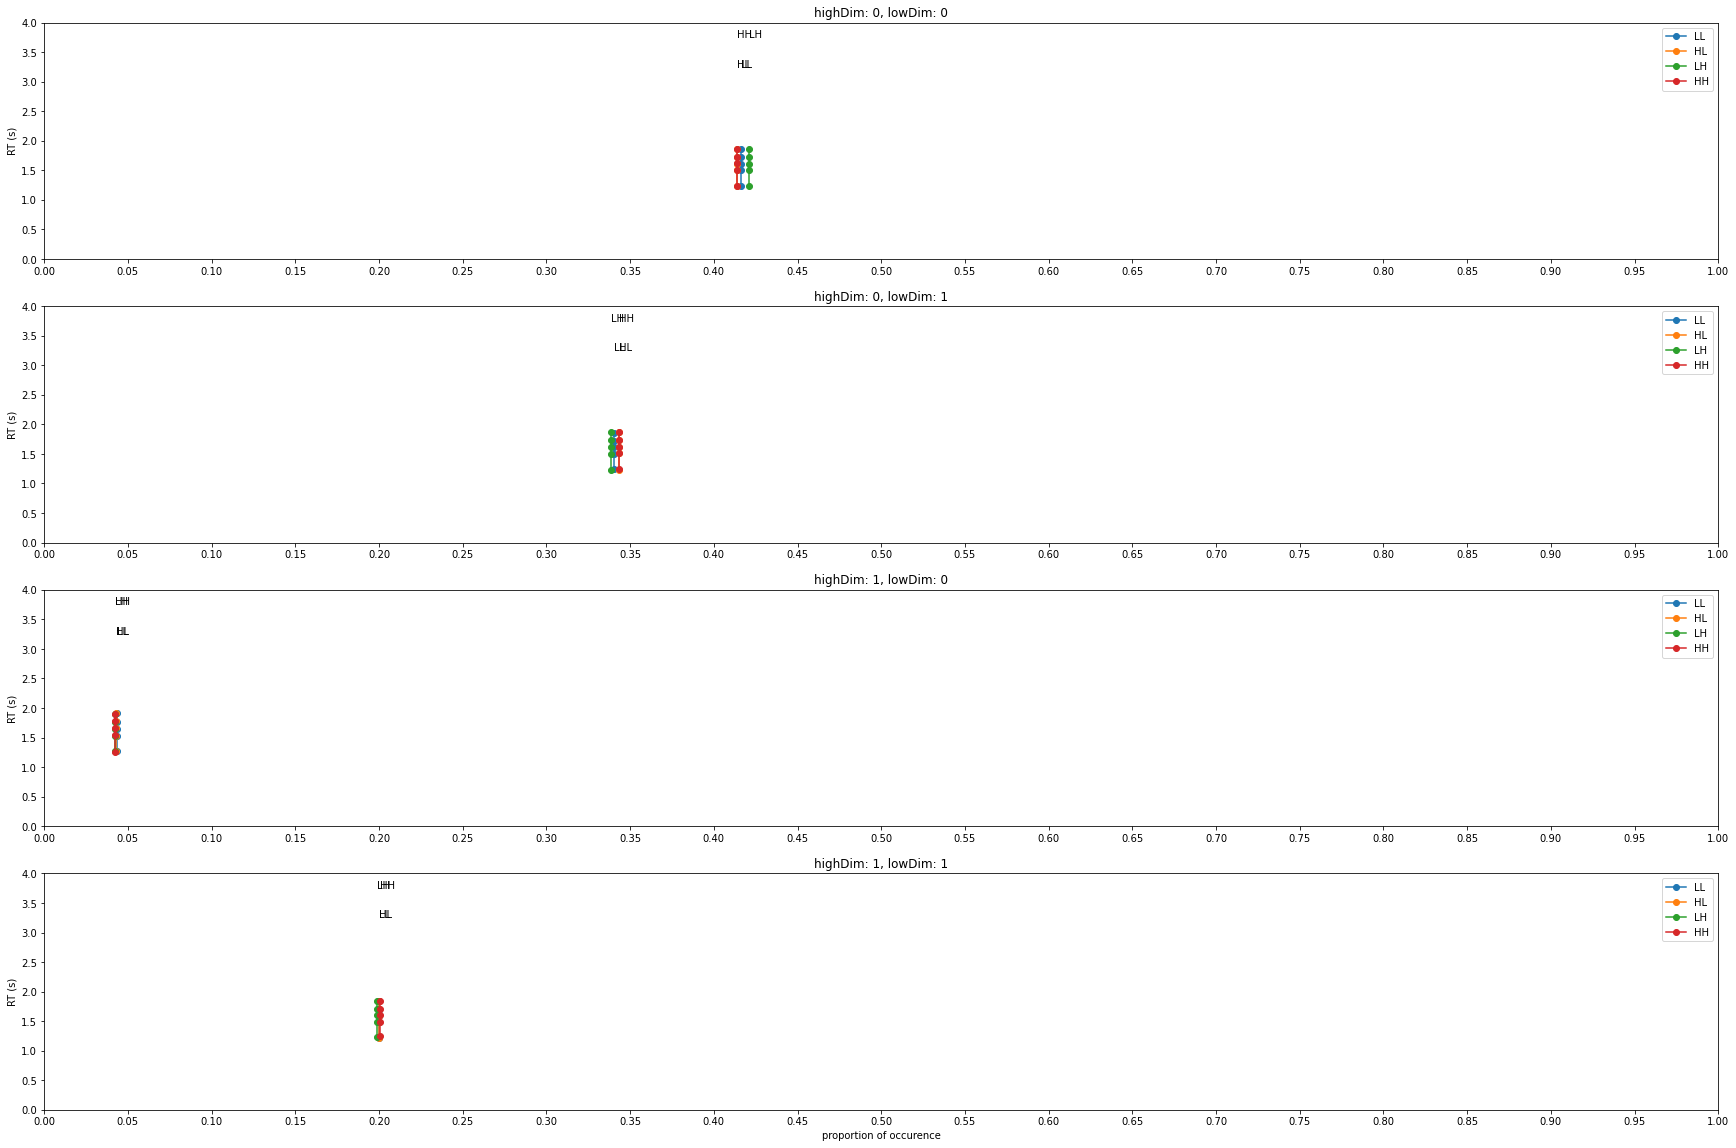

In [184]:
quant_prob_plot(b['ddm_seq2_angle_no_bias'],5)

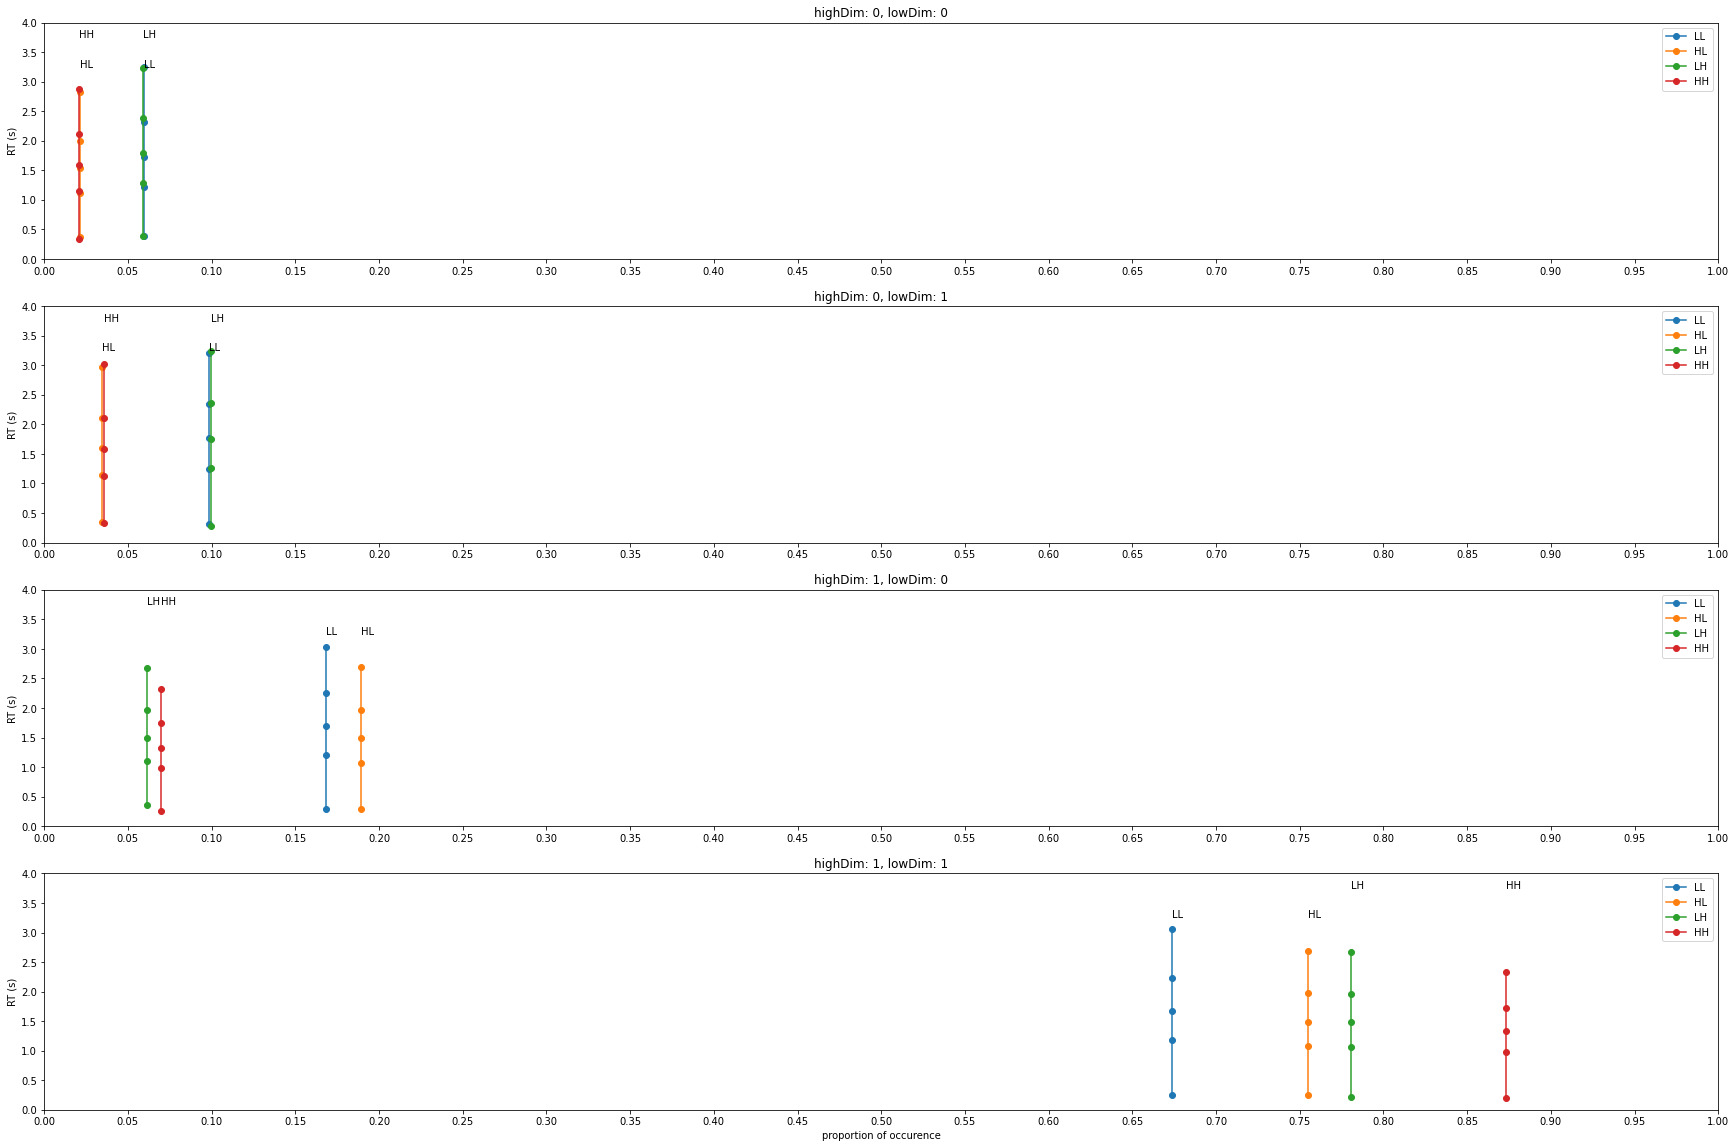

In [77]:
quant_prob_plot(d['ddm_seq2_no_bias'],5)

# Simulate and Recover

## Choose Model

In [324]:
model = 'ddm_seq2_no_bias'
nmcmc = 1000
nburn = 500

## Simulate

In [319]:
sim_data, sim_full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(data = chong_data,
                                                                                    model = model,
                                                                                    #n_subjects=1,
                                                                                    #n_trials_per_subject=10000,
                                                                                    p_outlier = 0.00,
                                                                                    conditions = None,
                                                                                    depends_on = {},#depends_on,
                                                                                    regression_models = [],
                                                                                    regression_covariates = None,
                                                                                    #group_only_regressors = False,
                                                                                    group_only = None,
                                                                                    fixed_at_default = None) #None) #['z'])

depends_on is:  {}


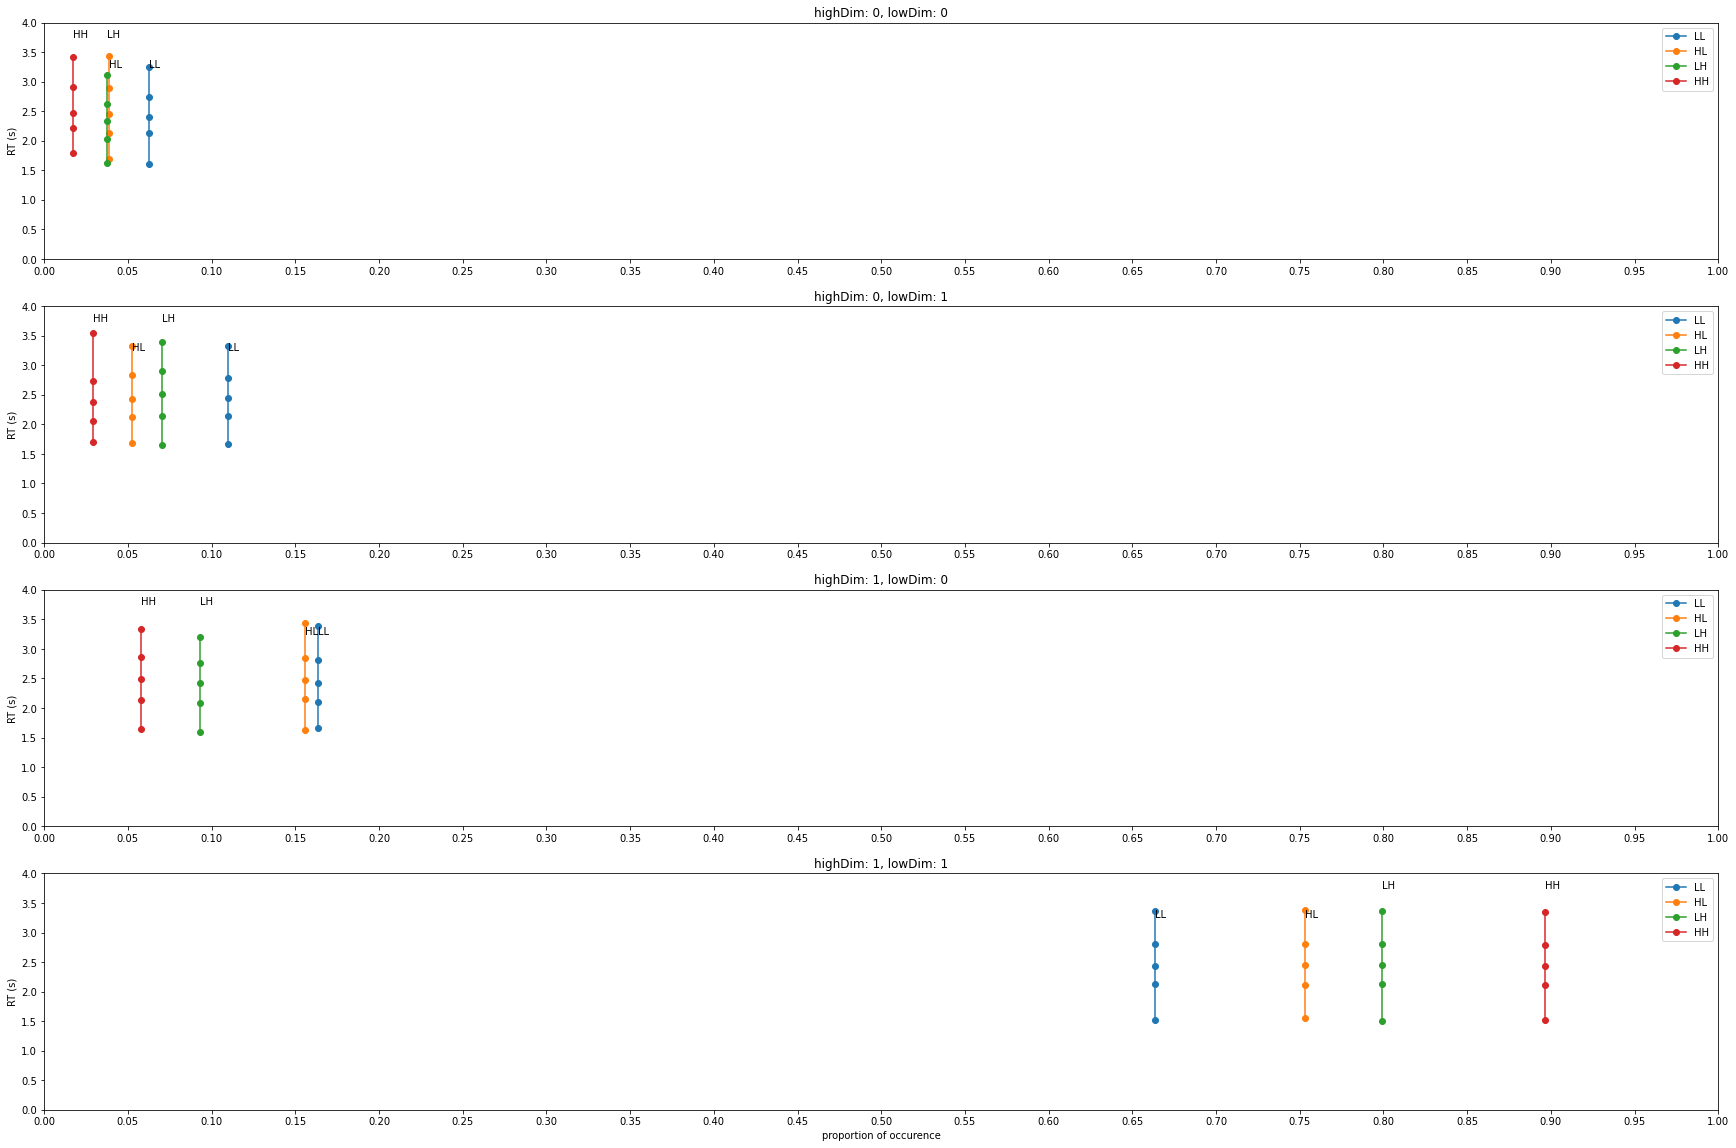

In [320]:
quant_prob_plot(sim_data,5)

In [316]:
#sim_params = pd.DataFrame.from_dict(sim_full_parameter_dict,orient='index').T
out=hddm.simulators.basic_simulator.simulator(sim_data[['vh','vl1','vl2','a','t']],model=model,n_samples=1)

In [ ]:
plt.plot()

## Original Method

In [322]:
hddm_model_ = hddm.HDDMnn(sim_data,
            model = model,
            informative = False,
            include = hddm.simulators.model_config[model]['hddm_include'],
            is_group_model = True,
            depends_on = {},
            p_outlier = 0,
            network_type='torch_mlp',
            )

Setting priors uninformative (LANs only work with uninformative priors for now)


In [325]:
# Sample from model              
hddm_model_.sample(nmcmc, 
      burn = nburn, 
      dbname = '' + \
              '{}_chong_task_{}_coh_{}_group_{}_chain_{}.db'.format(str(model),
                                                                    str(0),
                                                                    str(0), 
                                                                    str(1),
                                                                    str(1)),
                                                                    db = 'pickle')

 [-----------------100%-----------------] 1001 of 1000 complete in 739.0 sec

In [355]:
b = retrieve_data(['ddm_seq2_no_bias'],bySubj=True,byTask=False,byCoh=False,nthetas=100)

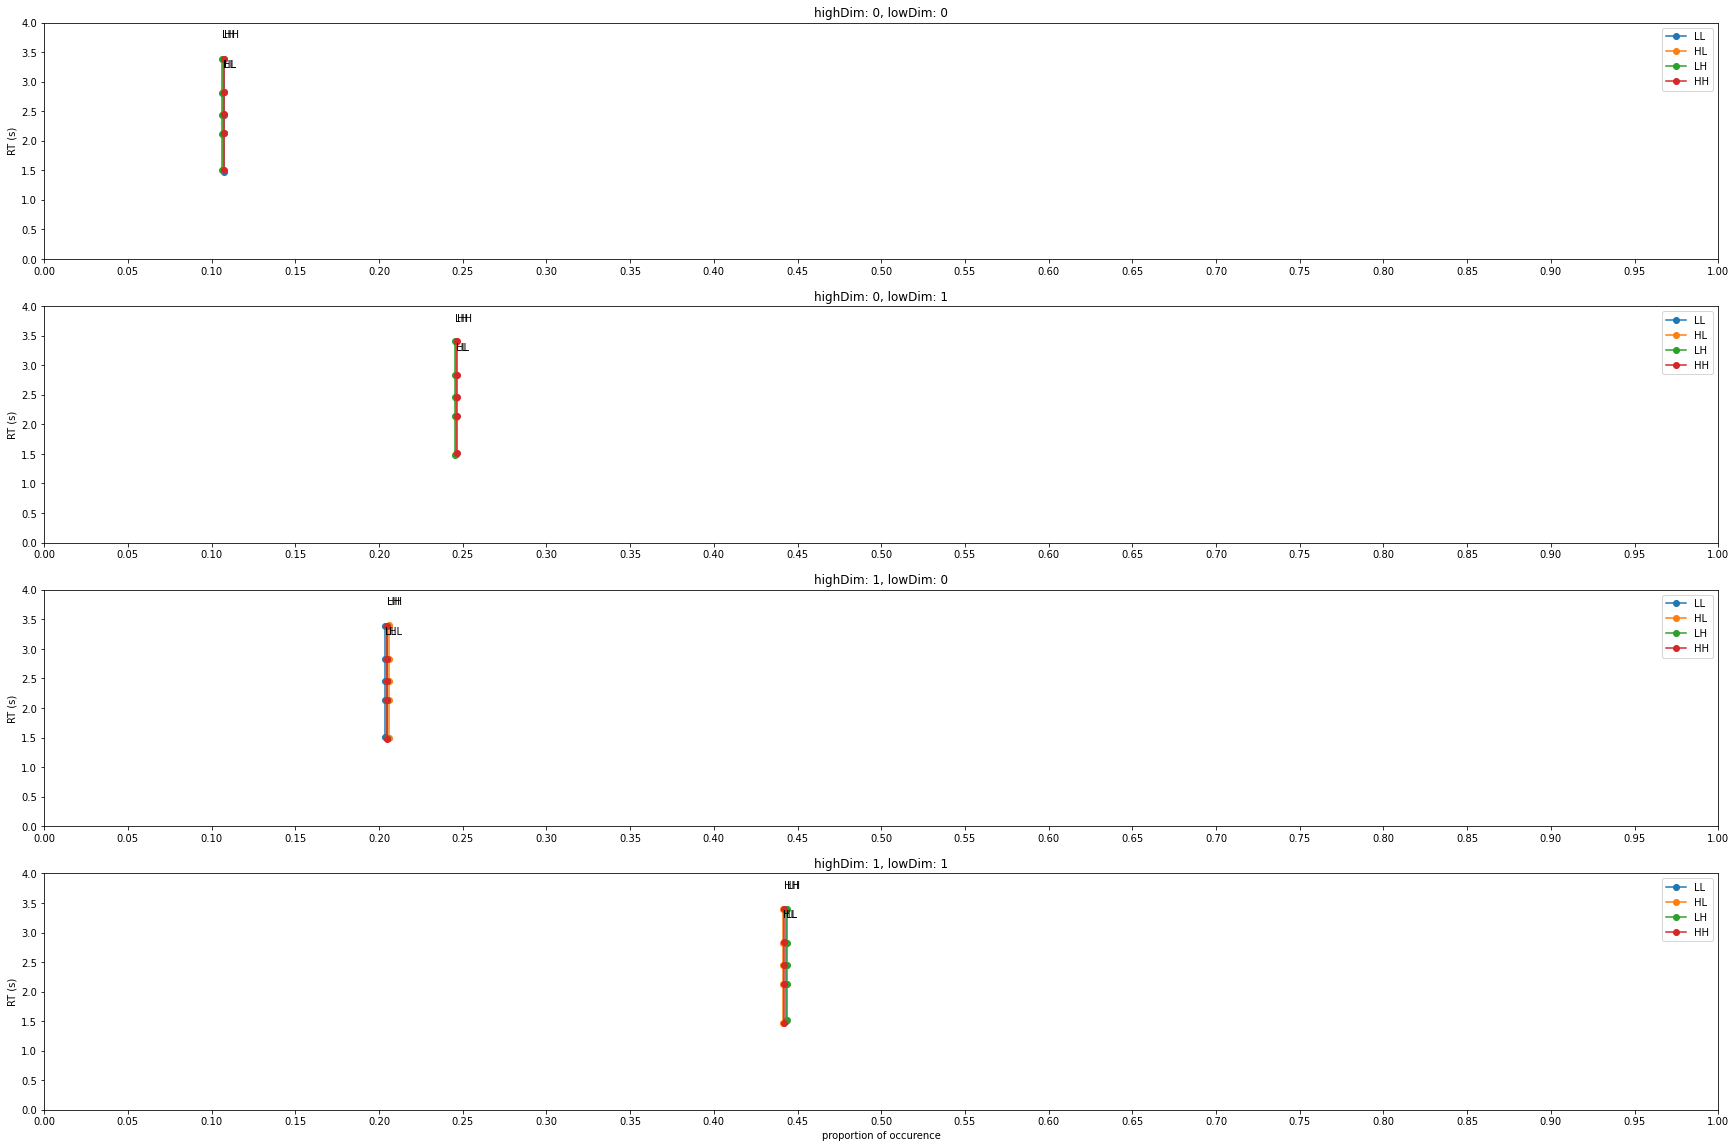

In [356]:
quant_prob_plot(b['ddm_seq2_no_bias'],5)

In [ ]:
pd.DataFrame.from_dict()

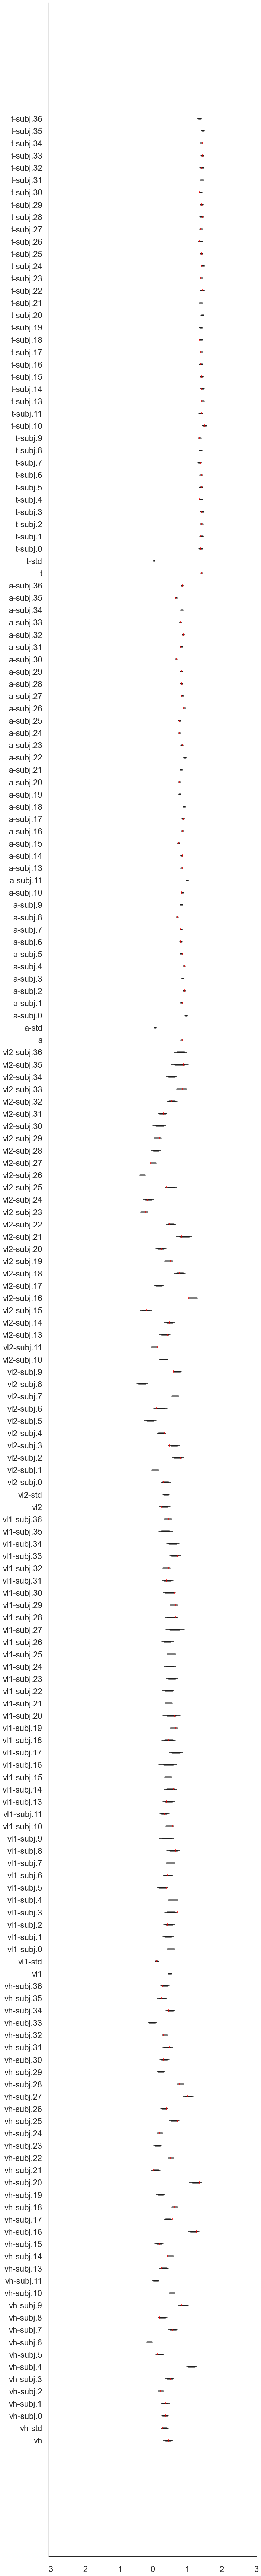

In [365]:
hddm.plotting.caterpillar_plot(hddm_model = hddm_model_,
                               ground_truth_parameter_dict = sim_full_parameter_dict,
                               drop_sd = False,
                               x_limits=[-3,3]
                               )

## New Method

In [ ]:
out 

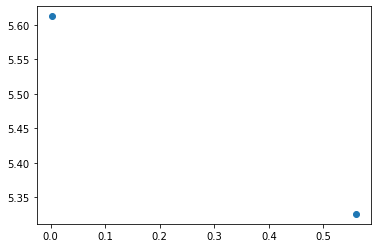

In [317]:
plt.scatter([np.mean(out[1]==2),np.mean(out[1]==1)],[np.mean(out[0][out[1]==2]),np.mean(out[0][out[1]==1])])

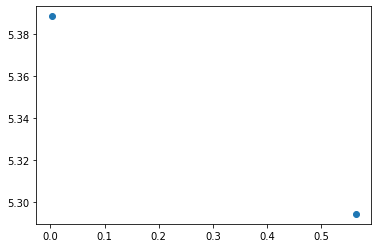

In [318]:
plt.scatter([np.sum(sim_data['response']==2)/len(sim_data['response']),np.sum(sim_data['response']==1)/len(sim_data['response'])],[np.mean(sim_data['rt'][sim_data['response']==2]),np.mean(sim_data['rt'][sim_data['response']==1])])

In [353]:
pd.DataFrame.from_dict(hddm_model_.values,orient='index').T

,vh,vh_std,vh_tau,vh_subj.0,vh_subj.1,vh_subj.2,vh_subj.3,vh_subj.4,vh_subj.5,vh_subj.6,...,t_subj.27,t_subj.28,t_subj.29,t_subj.30,t_subj.31,t_subj.32,t_subj.33,t_subj.34,t_subj.35,t_subj.36
0,0.448035,0.340817,8.609115,0.361154,0.36172,0.237383,0.491994,1.121784,0.207284,-0.089047,...,1.397535,1.413578,1.424405,1.388361,1.42278,1.42669,1.444066,1.414526,1.453298,1.352777
